In [1]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [2]:
#importing intial data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
print ("training data types")
print train.dtypes
print ("test data types")
print test.dtypes

training data types
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
test data types
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
#checking if count is sum of casual and registered
train['check']=np.where((train['count']==(train['registered']+train['casual'])),1,0)
train['check'].value_counts()

1    10886
Name: check, dtype: int64

In [8]:
#the count is sum of casual and registered
#predict the casual and registered separately and add them to get count

In [9]:
train.drop(['check'],axis=1,inplace=True)

In [10]:
train.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [11]:
test.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

In [12]:
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])

In [13]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [14]:
#number of test rows
print test.shape

(6493, 9)


In [15]:
#getting month,year, dayofmonth and hour from the datetime column
test['month']=test['datetime'].dt.month
test['year']=test['datetime'].dt.year
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour

train['month']=train['datetime'].dt.month
train['year']=train['datetime'].dt.year
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour

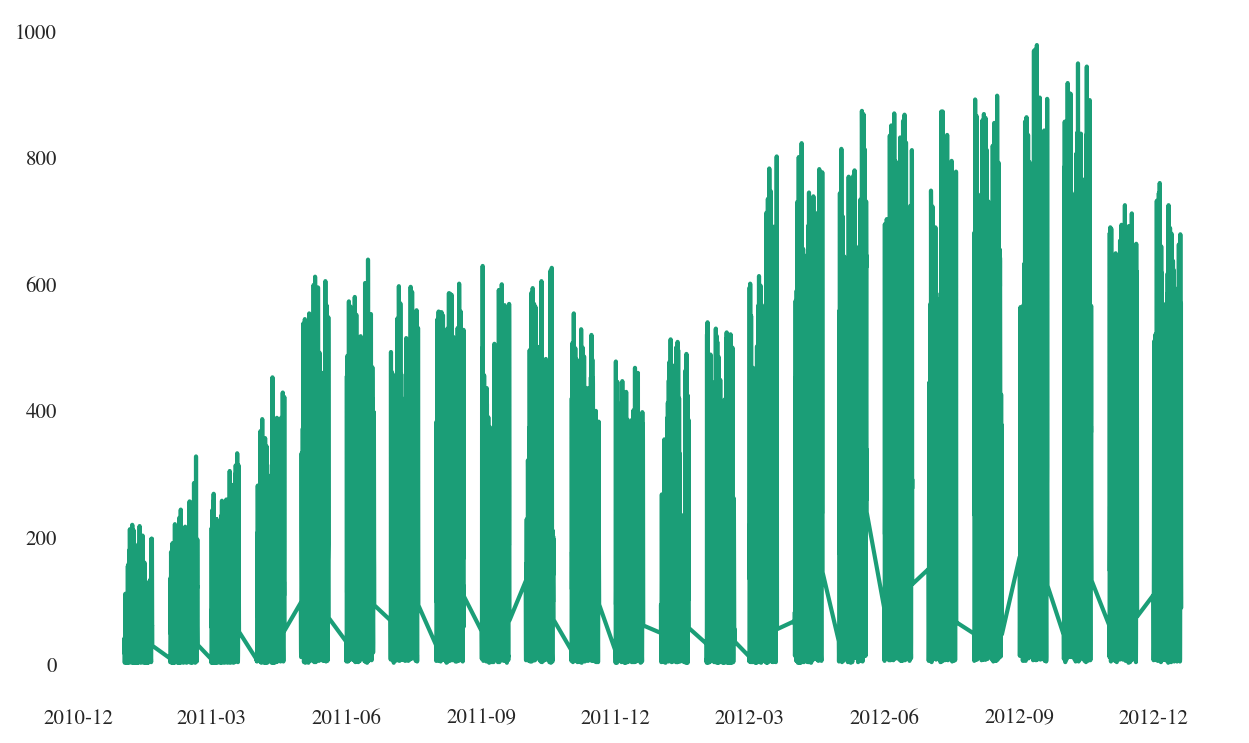

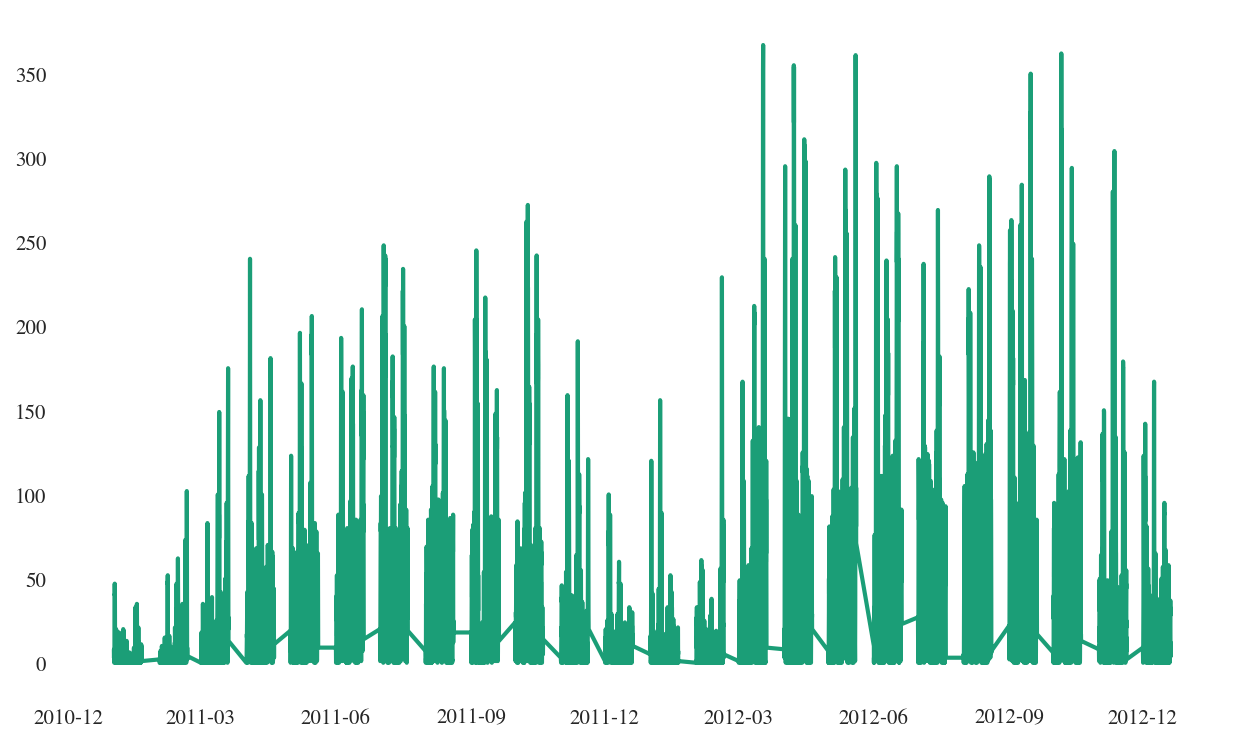

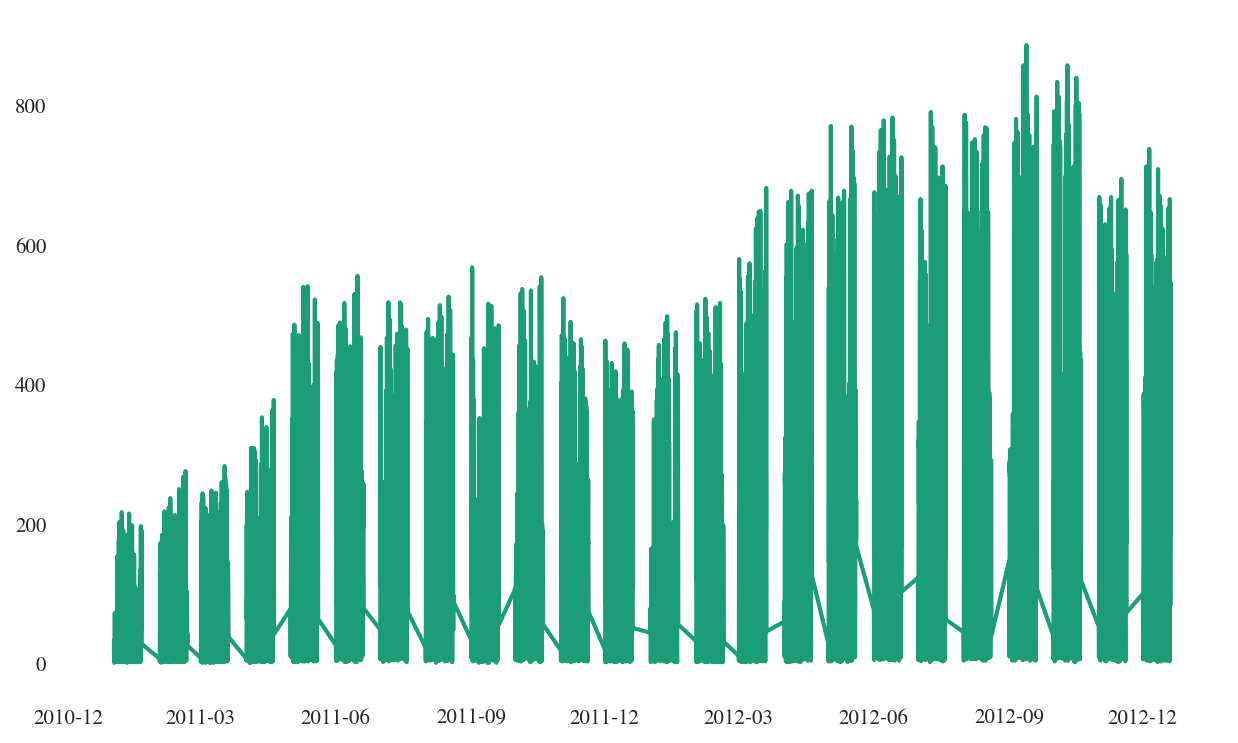

In [16]:
#plotting a timeseries plot of count and casual and registered
plt.plot(train['datetime'],train['count'])
plt.show()
plt.plot(train['datetime'],train['casual'])
plt.show()
plt.plot(train['datetime'],train['registered'])
plt.show()

In [17]:
#registered users contribute to the total count more compared to registered count

In [18]:
#univariate analysis 
train.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered', u'count',
       u'month', u'year', u'day', u'hour'],
      dtype='object')

In [19]:
print "train season"
print train['season'].value_counts()

print "test season"
print test['season'].value_counts()

train season
4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
test season
3    1763
2    1676
1    1556
4    1498
Name: season, dtype: int64


In [20]:
print "train holiday"
print train['holiday'].value_counts()

print "test holiday"
print test['holiday'].value_counts()

train holiday
0    10575
1      311
Name: holiday, dtype: int64
test holiday
0    6304
1     189
Name: holiday, dtype: int64


In [21]:
print "train working day"
print train['workingday'].value_counts()

print "test working day"
print test['workingday'].value_counts()

train working day
1    7412
0    3474
Name: workingday, dtype: int64
test working day
1    4453
0    2040
Name: workingday, dtype: int64


In [22]:
print "train weather"
print train['weather'].value_counts()
print "test weather"
print test['weather'].value_counts()

train weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
test weather
1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64


In [23]:
print "train month"
print train['month'].value_counts()
print "test month"
print test['month'].value_counts()

train month
7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64
test month
7     576
5     576
3     572
12    571
8     563
1     545
10    540
6     528
9     528
4     528
11    526
2     440
Name: month, dtype: int64


In [24]:
print "train year"
print train['year'].value_counts()
print "test year"
print test['year'].value_counts()

train year
2012    5464
2011    5422
Name: year, dtype: int64
test year
2012    3270
2011    3223
Name: year, dtype: int64


In [25]:
print "train day"
print train['day'].value_counts()
print "test day"
print test['day'].value_counts()

train day
1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64
test day
21    574
20    574
23    573
24    573
25    572
22    569
26    567
28    563
27    552
29    526
30    514
31    336
Name: day, dtype: int64


In [26]:
#there is obviously some missing dates from train data but not so much to be concerned about

In [27]:
train[['humidity','windspeed','temp','atemp']].describe()

,humidity,windspeed,temp,atemp
count,10886.000000,10886.000000,10886.00000,10886.000000
mean,61.886460,12.799395,20.23086,23.655084
std,19.245033,8.164537,7.79159,8.474601
min,0.000000,0.000000,0.82000,0.760000
25%,47.000000,7.001500,13.94000,16.665000
50%,62.000000,12.998000,20.50000,24.240000
75%,77.000000,16.997900,26.24000,31.060000
max,100.000000,56.996900,41.00000,45.455000


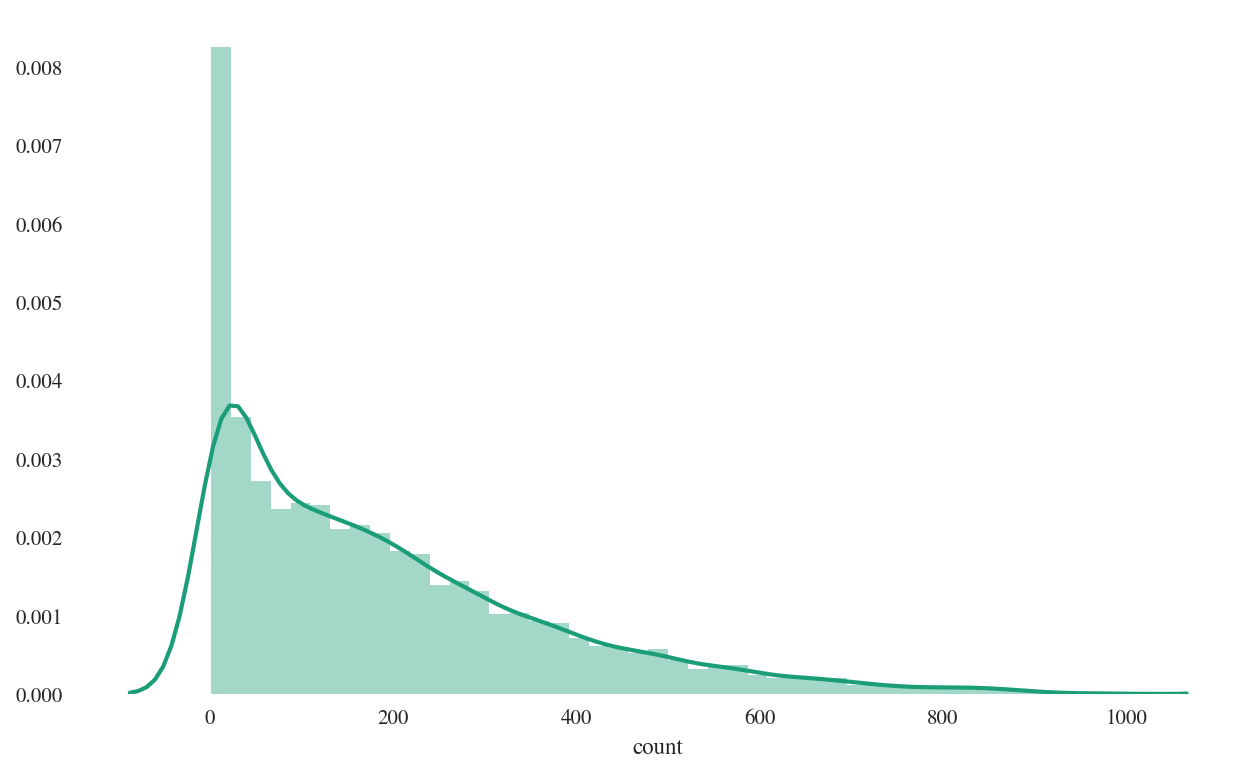

In [28]:
sns.distplot(train['count'])
plt.show()

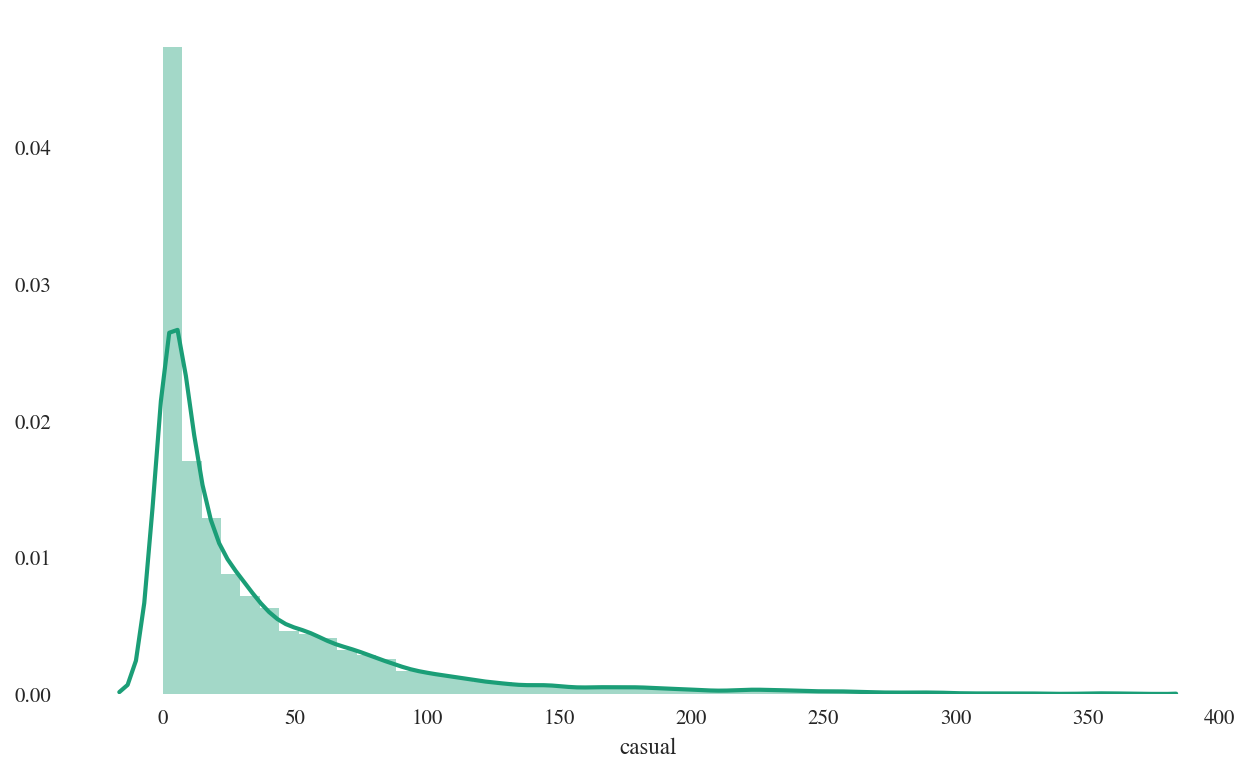

In [29]:
sns.distplot(train['casual'])
plt.show()

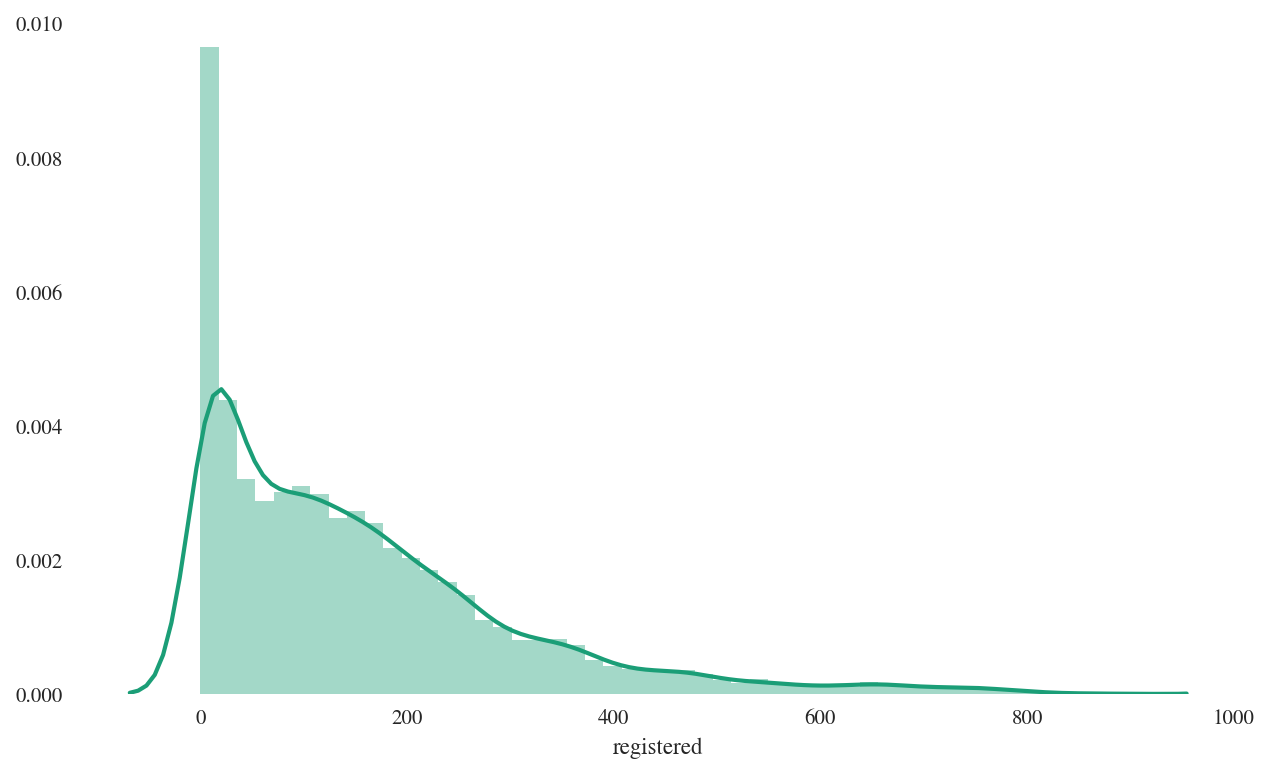

In [30]:
sns.distplot(train['registered'])
plt.show()

In [31]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.971524,-0.004797,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731,0.012021,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394,-0.002482,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144,-0.012548,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,0.061226,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,0.058540,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.078606,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,-0.015221,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.145241,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,0.264265,0.019111,0.380540


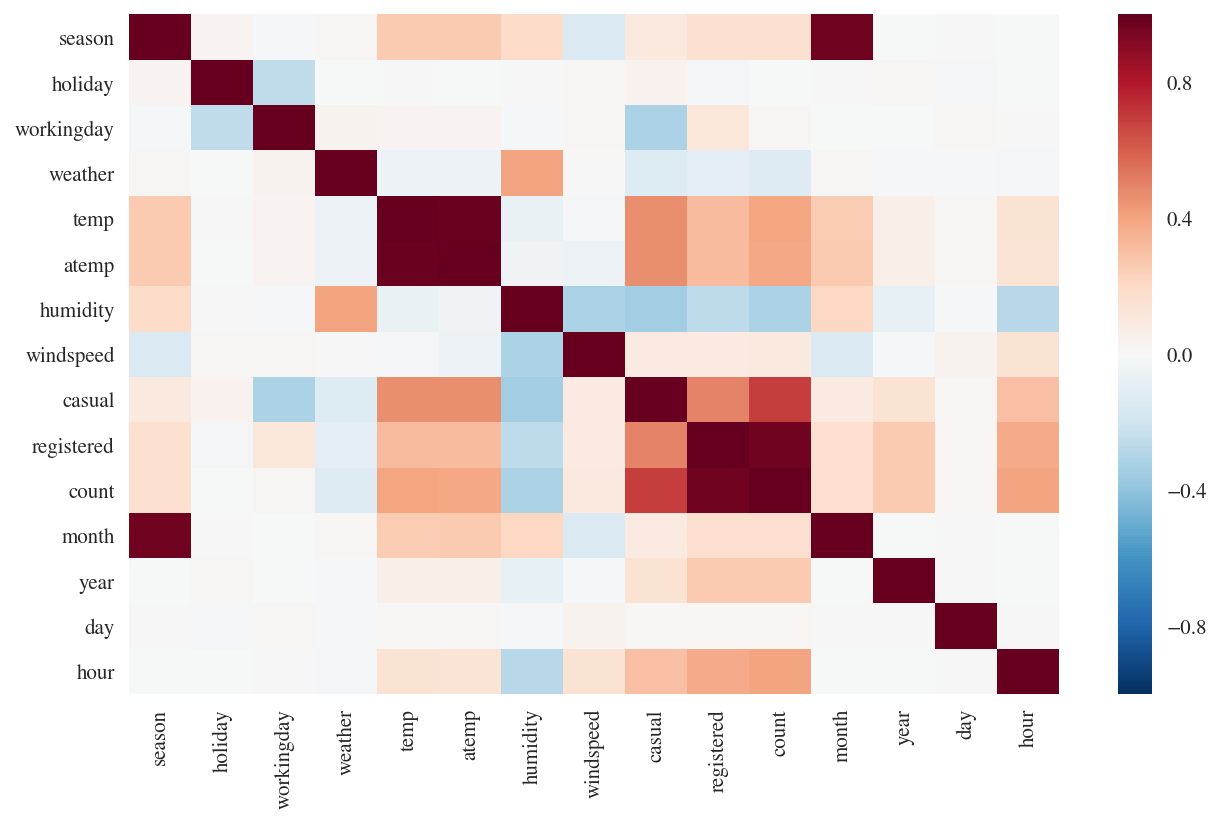

In [32]:
sns.heatmap(train.corr())
plt.show()

In [33]:
#month and season are highly correlated 

In [34]:
#feature engineering

In [35]:
#merging the weather category 4 into 1
train.loc[train[train['weather']==4]['weather'].index,'weather']=1
print "train"
print train['weather'].value_counts()
test.loc[test[test['weather']==4]['weather'].index,'weather']=1
print "test"
print test['weather'].value_counts()

train
1    7193
2    2834
3     859
Name: weather, dtype: int64
test
1    4223
2    1710
3     560
Name: weather, dtype: int64


In [36]:
casual_cat=[]
casual_cont=[]
reg_cat=[]
reg_cont=[]

In [37]:
casual_cat.append("weather")
reg_cat.append("weather")

In [38]:
#finding weekday
train['weekday']=train['datetime'].dt.dayofweek
test['weekday']=test['datetime'].dt.dayofweek
print "train weekday"
print train['weekday'].value_counts()
print "test weekday"
print test['weekday'].value_counts()


train weekday
5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: weekday, dtype: int64
test weekday
4    958
5    928
0    928
2    924
6    923
3    918
1    914
Name: weekday, dtype: int64


In [39]:
train[train['workingday']==0]['weekday'].value_counts()

5    1584
6    1579
0     239
4      48
2      24
Name: weekday, dtype: int64

In [40]:
#making a new feature weekends
train["weekends"]=train['weekday'].apply(lambda x: '1' if x == 5 or x==6 else 0)

In [41]:
test["weekends"]=test['weekday'].apply(lambda x: '1' if x == 5 or x==6 else 0)

In [42]:
casual_cat.append("weekends")
reg_cat.append("weekends")

In [43]:
#dealing with casual and registered differently
casual=train.drop(['registered','count'],axis=1)
registered=train.drop(['casual','count'],axis=1)

casual plot
7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64


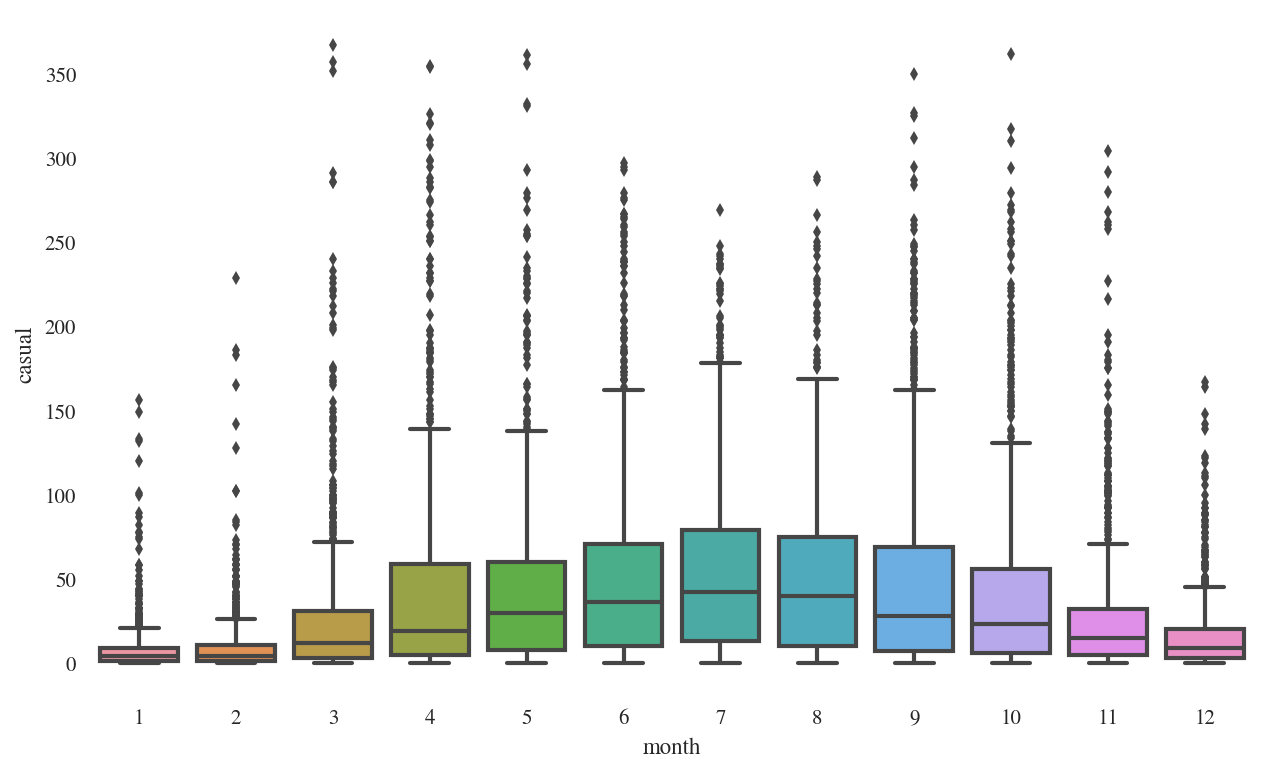

registered plot
7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64


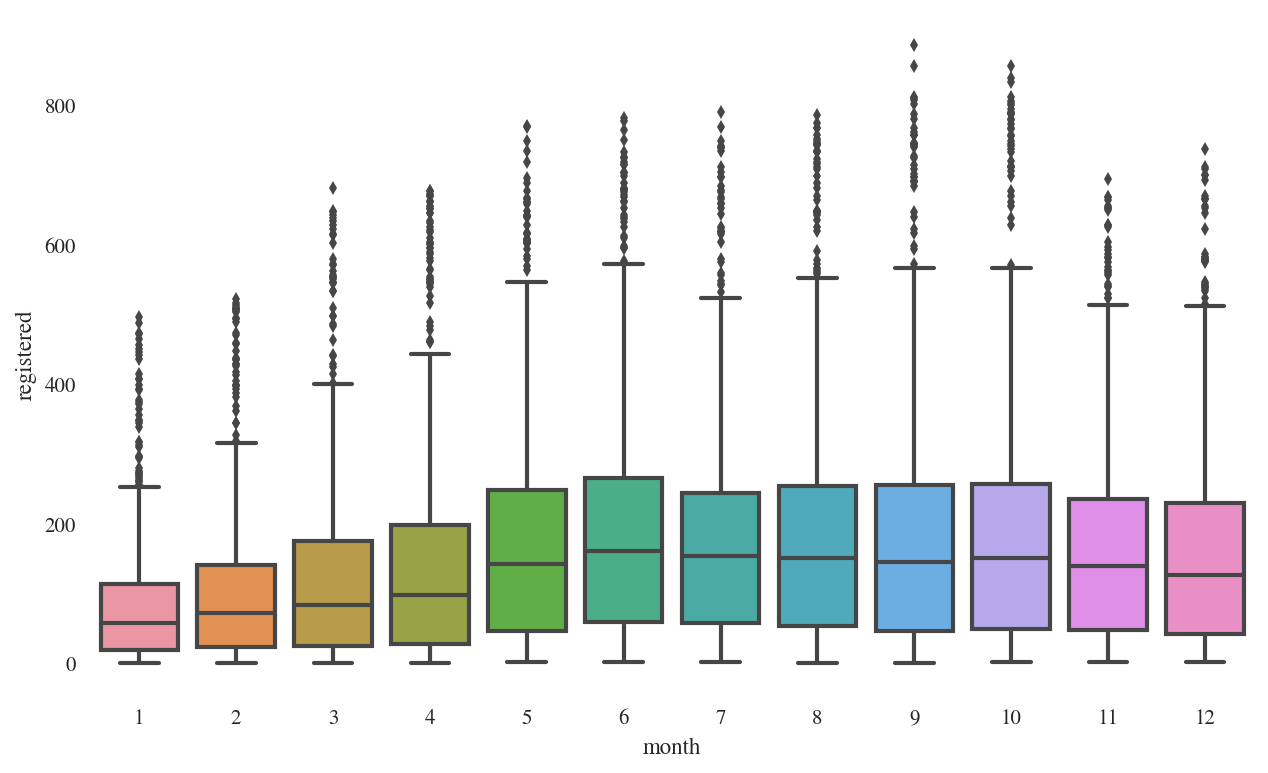

In [44]:
#binning the month variable
print "casual plot"
print casual['month'].value_counts() 
sns.boxplot(casual['month'], casual['casual'])
plt.show()
print "registered plot"
print registered['month'].value_counts() 
sns.boxplot(registered['month'], registered['registered'])
plt.show()

In [45]:
#binning casual month data 
casual['month_bin1']=casual['month']
casual['month_bin1'][(casual['month_bin1']>4) & (casual['month_bin1']<9)] = 7
casual['month_bin1'][(casual['month_bin1']>0) & (casual['month_bin1']<4)] = 2
casual['month_bin1'][(casual['month_bin1']==12)] = 2
casual['month_bin1'][(casual['month_bin1']>8) & (casual['month_bin1']<12)] = 9
casual['month_bin1'][(casual['month_bin1']==4)] = 9
print " month_bin1 value_counts"
print casual['month_bin1'].value_counts()

 month_bin1 value_counts
7    3648
9    3640
2    3598
Name: month_bin1, dtype: int64


In [46]:
test_cas=test.copy()
test_reg=test.copy()
test_cas['month_bin1']=test_cas['month']
test_cas['month_bin1'][(test_cas['month_bin1']>4) & (test_cas['month_bin1']<9)] = 7
test_cas['month_bin1'][(test_cas['month_bin1']>0) & (test_cas['month_bin1']<4)] = 2
test_cas['month_bin1'][(test_cas['month_bin1']==12)] = 2
test_cas['month_bin1'][(test_cas['month_bin1']>8) & (test_cas['month_bin1']<12)] = 9
test_cas['month_bin1'][(test_cas['month_bin1']==4)] = 9
print " month_bin1 value_counts"
print test_cas['month_bin1'].value_counts()

 month_bin1 value_counts
7    2243
2    2128
9    2122
Name: month_bin1, dtype: int64


In [47]:
#binning the registered data
registered['month_bin1']=registered['month']
registered['month_bin1'][(registered['month_bin1']>5)] = 8
registered['month_bin1'][(registered['month_bin1']<5)] = 2
print " month_bin1 value_counts"
print registered['month_bin1'].value_counts()

 month_bin1 value_counts
8    6379
2    3595
5     912
Name: month_bin1, dtype: int64


In [48]:
test_reg['month_bin1']=test_reg['month']
test_reg['month_bin1'][(test_reg['month_bin1']>5)] = 8
test_reg['month_bin1'][(test_reg['month_bin1']<5)] = 2
print " month_bin1 value_counts"
print test_reg['month_bin1'].value_counts()

 month_bin1 value_counts
8    3832
2    2085
5     576
Name: month_bin1, dtype: int64


In [49]:
#binning the months in a new style
casual['ordered_months'] = casual['month']
casual['ordered_months'][casual['year']==2012] = 12+casual['ordered_months'][casual['year']==2012]

registered['ordered_months'] = registered['month']
registered['ordered_months'][registered['year']==2012] = 12+registered['ordered_months'][registered['year']==2012]

test['ordered_months'] = test['month']
test['ordered_months'][test['year']==2012] = 12+test['ordered_months'][test['year']==2012]
test_cas['ordered_months']=test['ordered_months']
test_reg['ordered_months']=test['ordered_months']

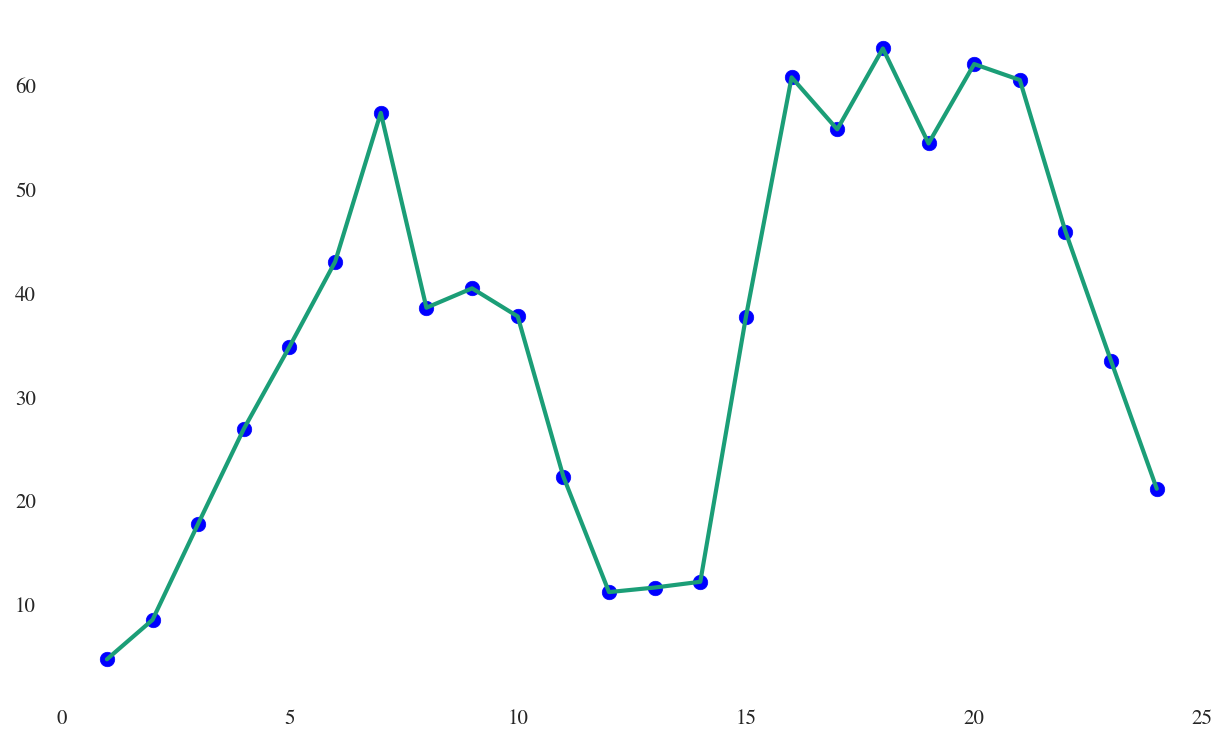

In [50]:
t = casual.groupby('ordered_months')['ordered_months','casual'].mean()
plt.plot(t['ordered_months'], t['casual'])
plt.scatter(t['ordered_months'], t['casual'], color = 'b')
plt.show()

In [51]:
casual['month_bin2']=casual['ordered_months']
casual['month_bin2'][(casual['month_bin2']>10)&(casual['month_bin2']<15)]=12
casual['month_bin2'][(casual['month_bin2']>7)&(casual['month_bin2']<11)]=9
casual['month_bin2'][(casual['month_bin2']>15)&(casual['month_bin2']<22)]=17
print "casual month_bin2"
print casual['month_bin2'].value_counts()

test_cas['month_bin2']=test_cas['ordered_months']
test_cas['month_bin2'][(test_cas['month_bin2']>10)&(test_cas['month_bin2']<15)]=12
test_cas['month_bin2'][(test_cas['month_bin2']>7)&(test_cas['month_bin2']<11)]=9
test_cas['month_bin2'][(test_cas['month_bin2']>15)&(test_cas['month_bin2']<22)]=17
print "test month_bin2"
print test_cas['month_bin2'].value_counts()



casual month_bin2
17    2734
12    1820
9     1364
7      456
22     456
6      456
5      456
24     456
23     455
15     455
4      455
3      446
2      446
1      431
Name: month_bin2, dtype: int64
test month_bin2
17    1656
12    1073
9      827
15     288
7      288
5      288
24     286
3      284
6      264
4      264
23     263
1      257
22     252
2      203
Name: month_bin2, dtype: int64


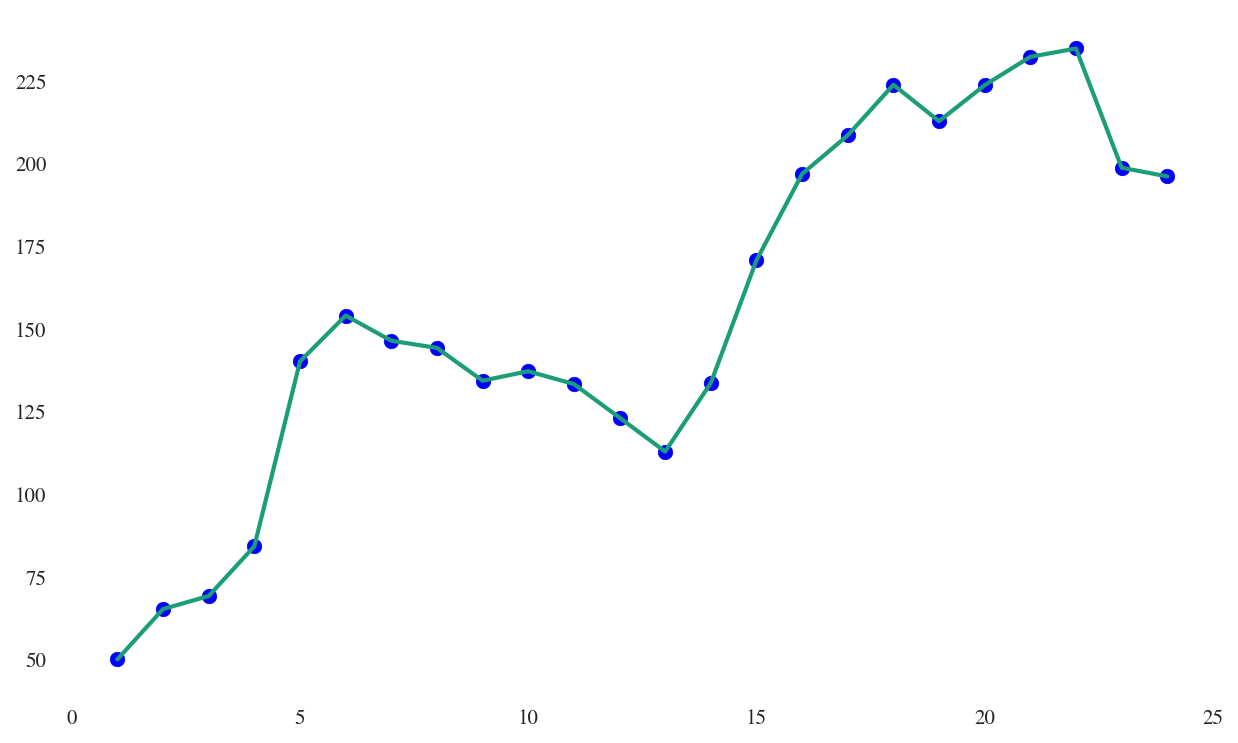

In [52]:
t = registered.groupby('ordered_months')['ordered_months','registered'].mean()
plt.plot(t['ordered_months'], t['registered'])
plt.scatter(t['ordered_months'], t['registered'], color = 'b')
plt.show()

In [53]:
registered['month_bin2']=registered['ordered_months']
registered['month_bin2'][(registered['month_bin2']>4)&(registered['month_bin2']<15)]=8
registered['month_bin2'][(registered['month_bin2']>16)&(registered['month_bin2']<23)]=19
print "registered month_bin2"
print registered['month_bin2'].value_counts()

test_reg['month_bin2']=test_reg['ordered_months']
test_reg['month_bin2'][(test_reg['month_bin2']>4)&(test_reg['month_bin2']<15)]=8
test_reg['month_bin2'][(test_reg['month_bin2']>16)&(test_reg['month_bin2']<23)]=19
print "registered month_bin2"
print test_reg['month_bin2'].value_counts()


registered month_bin2
8     4552
19    2736
24     456
23     455
15     455
4      455
16     454
3      446
2      446
1      431
Name: month_bin2, dtype: int64
registered month_bin2
8     2740
19    1644
15     288
24     286
3      284
16     264
4      264
23     263
1      257
2      203
Name: month_bin2, dtype: int64


In [54]:
casual_cat+=["month","month_bin1","ordered_months","month_bin2"]
reg_cat+=["month","month_bin1","ordered_months","month_bin2"]

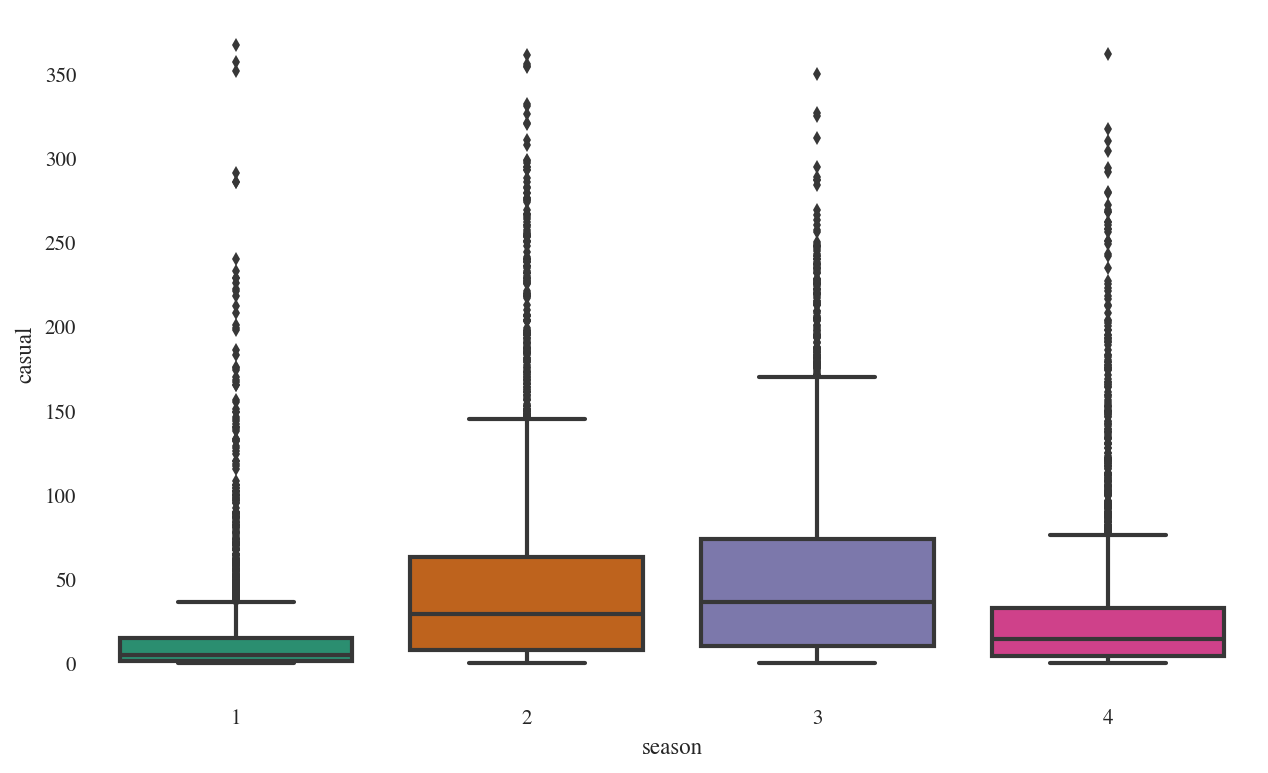

In [55]:
#from correlation season doesnt look like an important variable
sns.boxplot(casual['season'],casual['casual'])
plt.show()

In [56]:
#new variable season_bin merges 1,4 and 2,3
casual['season_bin']=casual['season']
casual['season_bin'][(casual['season_bin']==1)]=0
casual['season_bin'][(casual['season_bin']==4)]=0
casual['season_bin'][(casual['season_bin']==2)]=1
casual['season_bin'][(casual['season_bin']==3)]=1
print "season bin casual"
print casual['season_bin'].value_counts()

test_cas['season_bin']=test_cas['season']
test_cas['season_bin'][(test_cas['season_bin']==1)]=0
test_cas['season_bin'][(test_cas['season_bin']==4)]=0
test_cas['season_bin'][(test_cas['season_bin']==2)]=1
test_cas['season_bin'][(test_cas['season_bin']==3)]=1
print "season bin test_cas"
print test_cas['season_bin'].value_counts()

season bin casual
1    5466
0    5420
Name: season_bin, dtype: int64
season bin test_cas
1    3439
0    3054
Name: season_bin, dtype: int64


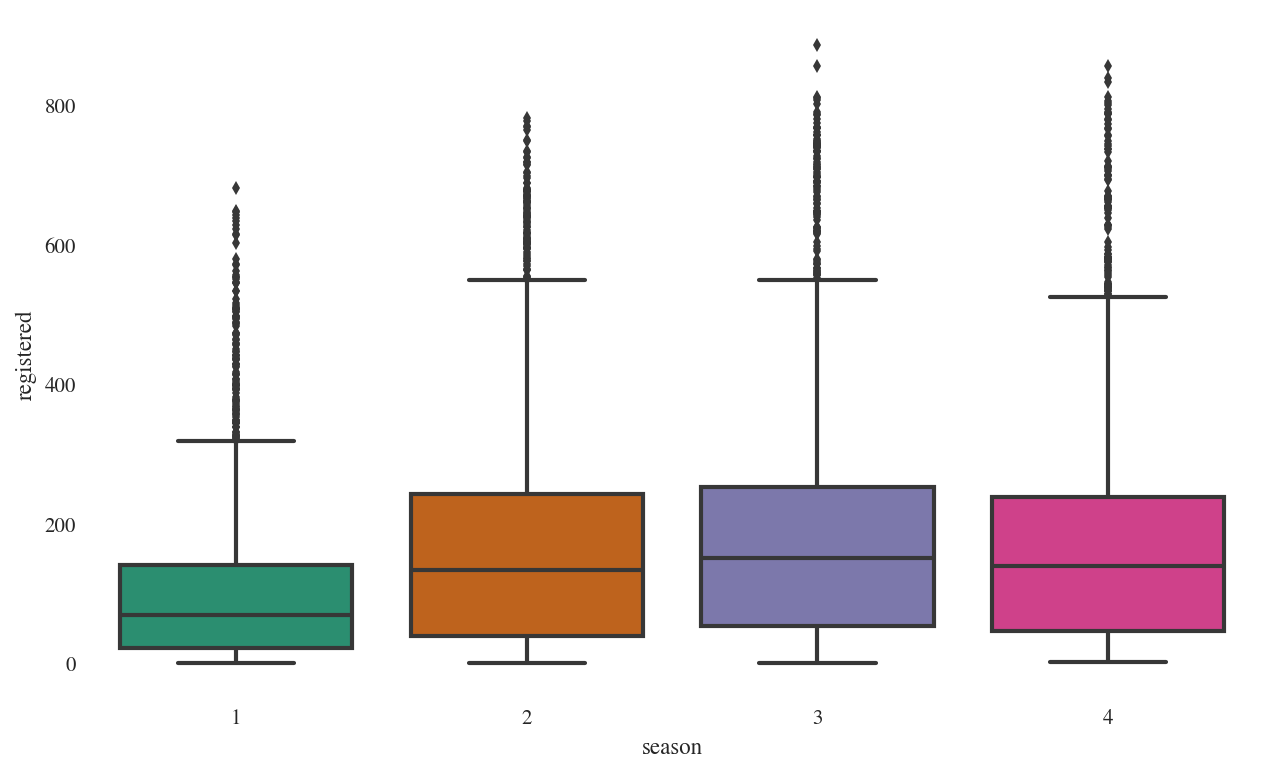

In [57]:
#from correlation season doesnt look like an important variable
sns.boxplot(registered['season'],registered['registered'])
plt.show()

In [58]:
#new variable season_bin merges 1 and 2,3,4
registered['season_bin']=registered['season']
registered['season_bin'][(registered['season_bin']==1)]=0
registered['season_bin'][(registered['season_bin']==4)]=1
registered['season_bin'][(registered['season_bin']==2)]=1
registered['season_bin'][(registered['season_bin']==3)]=1
print "season bin registered"
print registered['season_bin'].value_counts()

test_reg['season_bin']=test_reg['season']
test_reg['season_bin'][(test_reg['season_bin']==1)]=0
test_reg['season_bin'][(test_reg['season_bin']==4)]=1
test_reg['season_bin'][(test_reg['season_bin']==2)]=1
test_reg['season_bin'][(test_reg['season_bin']==3)]=1
print "season bin test_reg"
print test_reg['season_bin'].value_counts()


season bin registered
1    8200
0    2686
Name: season_bin, dtype: int64
season bin test_reg
1    4937
0    1556
Name: season_bin, dtype: int64


In [59]:
casual_cat+=["season","season_bin"]
reg_cat+=["season","season_bin"]

In [60]:
casual_cat+=["holiday","workingday","year","weekends"]
reg_cat+=["holiday","workingday","year","weekends"]

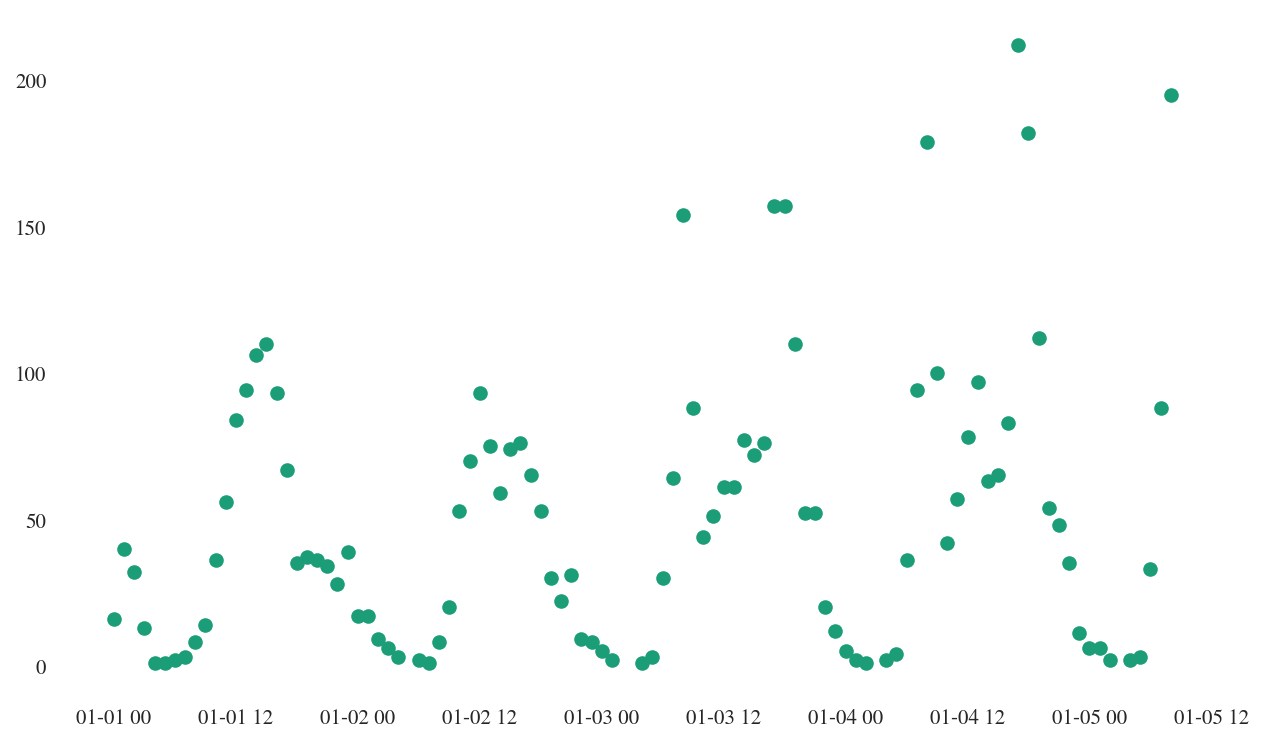

In [61]:
import matplotlib
from datetime import datetime
dates = matplotlib.dates.date2num(train.iloc[0:100]['datetime'].astype(datetime))
plt.plot_date(dates, train.iloc[0:100]['count'])

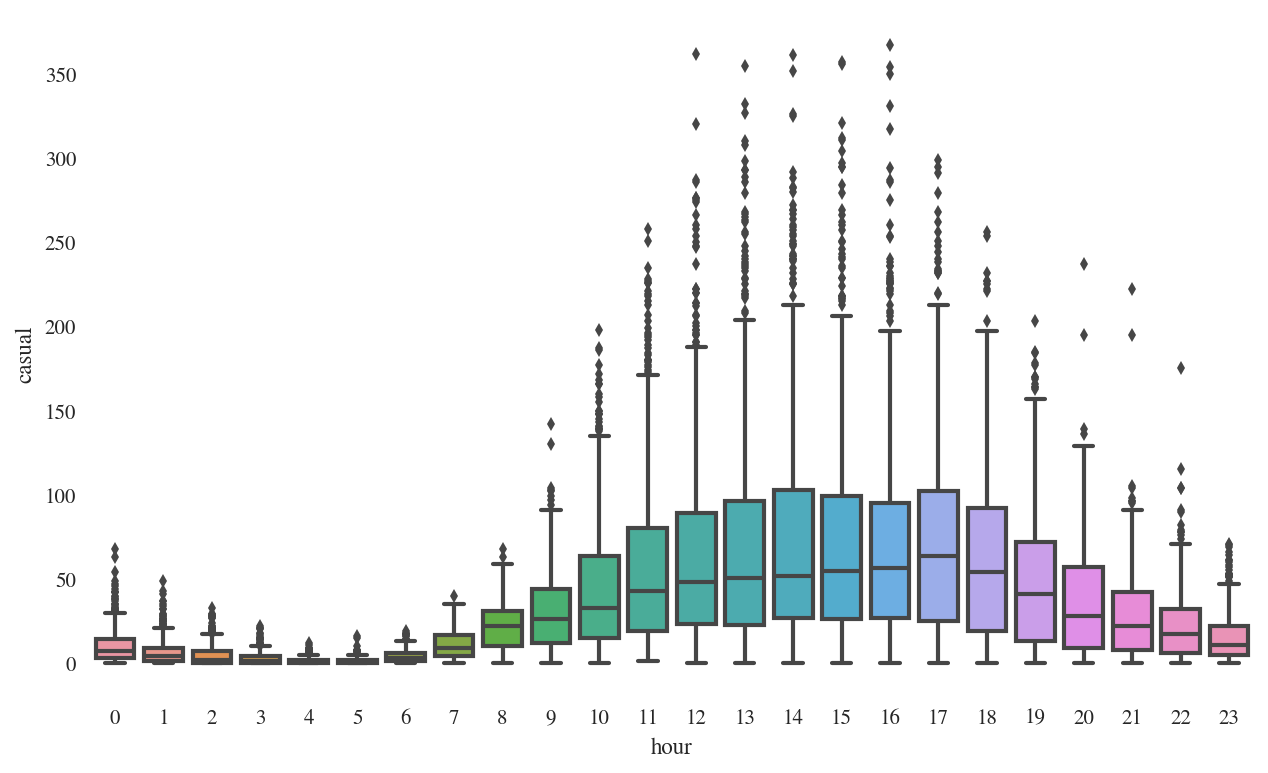

In [62]:
#hours can be binned
sns.boxplot(casual['hour'],casual['casual'])
plt.show()

In [63]:
casual['hour_bin']=1
casual['hour_bin'][(casual['hour']>6)&(casual['hour']<12)]=2
casual['hour_bin'][(casual['hour']>18)&(casual['hour']<24)]=2
casual['hour_bin'][(casual['hour']>11)&(casual['hour']<17)]=3
casual['hour_bin'][(casual['hour']>16)&(casual['hour']<19)]=4

test_cas['hour_bin']=1
test_cas['hour_bin'][(test_cas['hour']>6)&(test_cas['hour']<12)]=2
test_cas['hour_bin'][(test_cas['hour']>18)&(test_cas['hour']<24)]=2
test_cas['hour_bin'][(test_cas['hour']>11)&(test_cas['hour']<17)]=3
test_cas['hour_bin'][(test_cas['hour']>16)&(test_cas['hour']<19)]=4

casual_cat+=["hour","hour_bin"]

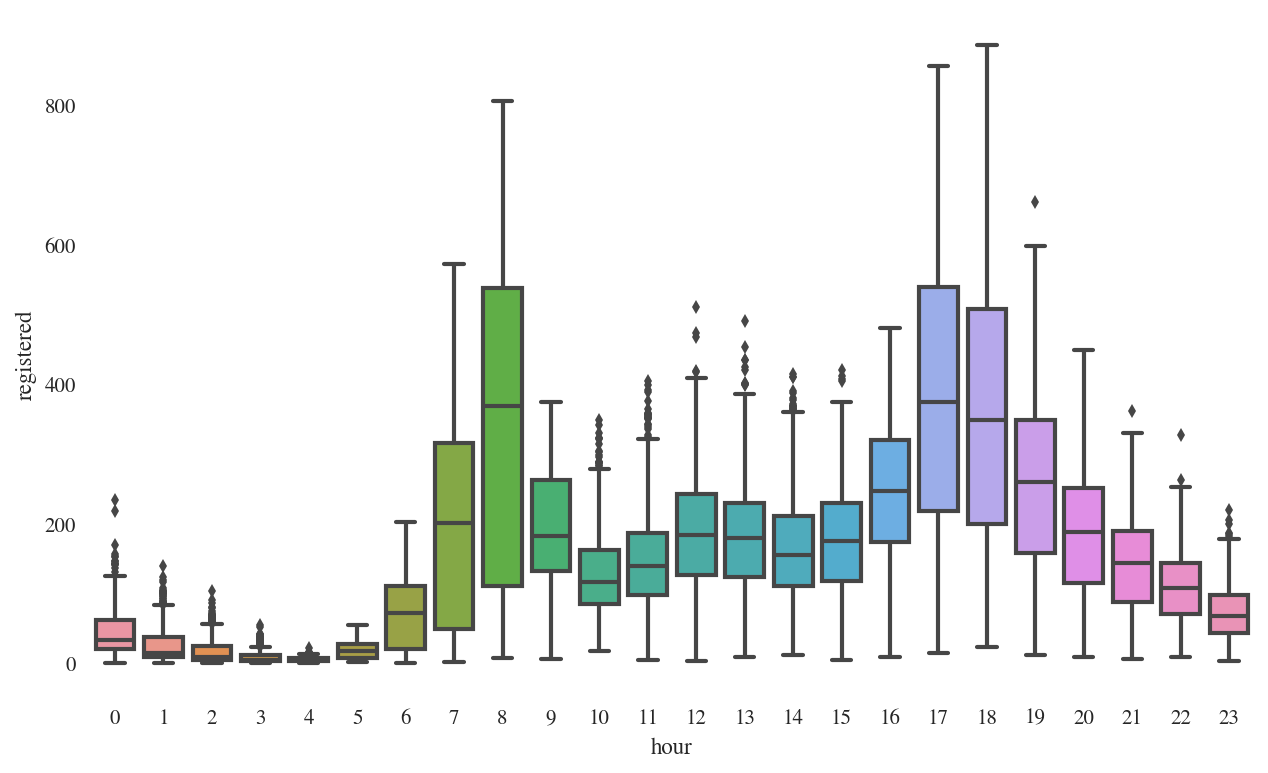

In [64]:
sns.boxplot(registered['hour'],registered['registered'])
plt.show()

In [65]:
registered['hour_bin']=1
registered['hour_bin'][(registered['hour']>8)&(registered['hour']>17)]=2
registered['hour_bin'][(registered['hour']>5)&(registered['hour']>9)]=3
registered['hour_bin'][(registered['hour']>16)&(registered['hour']>24)]=4

test_reg['hour_bin']=1
test_reg['hour_bin'][(test_reg['hour']>8)&(test_reg['hour']>17)]=2
test_reg['hour_bin'][(test_reg['hour']>5)&(test_reg['hour']>9)]=3
test_reg['hour_bin'][(test_reg['hour']>16)&(test_reg['hour']>24)]=4

reg_cat+=["hour","hour_bin"]



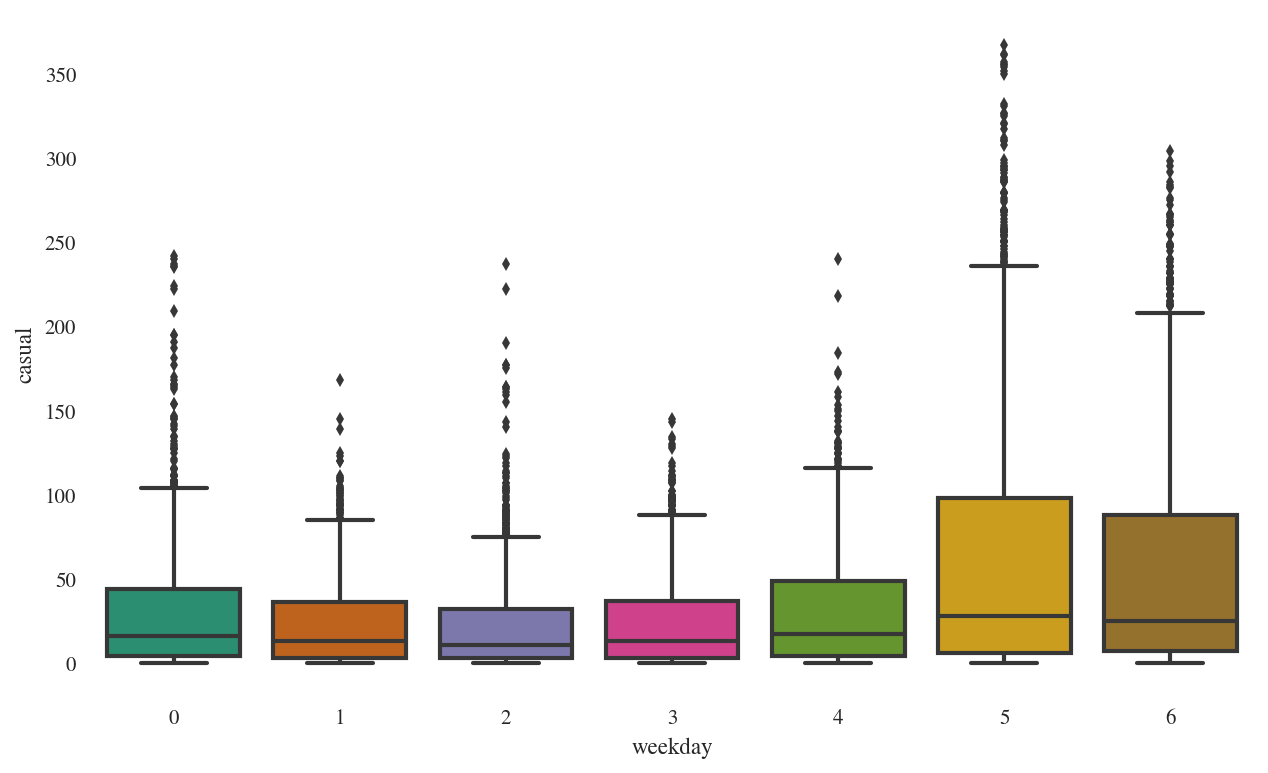

In [66]:
#bin weekday
sns.boxplot(casual['weekday'],casual['casual'])
plt.show()

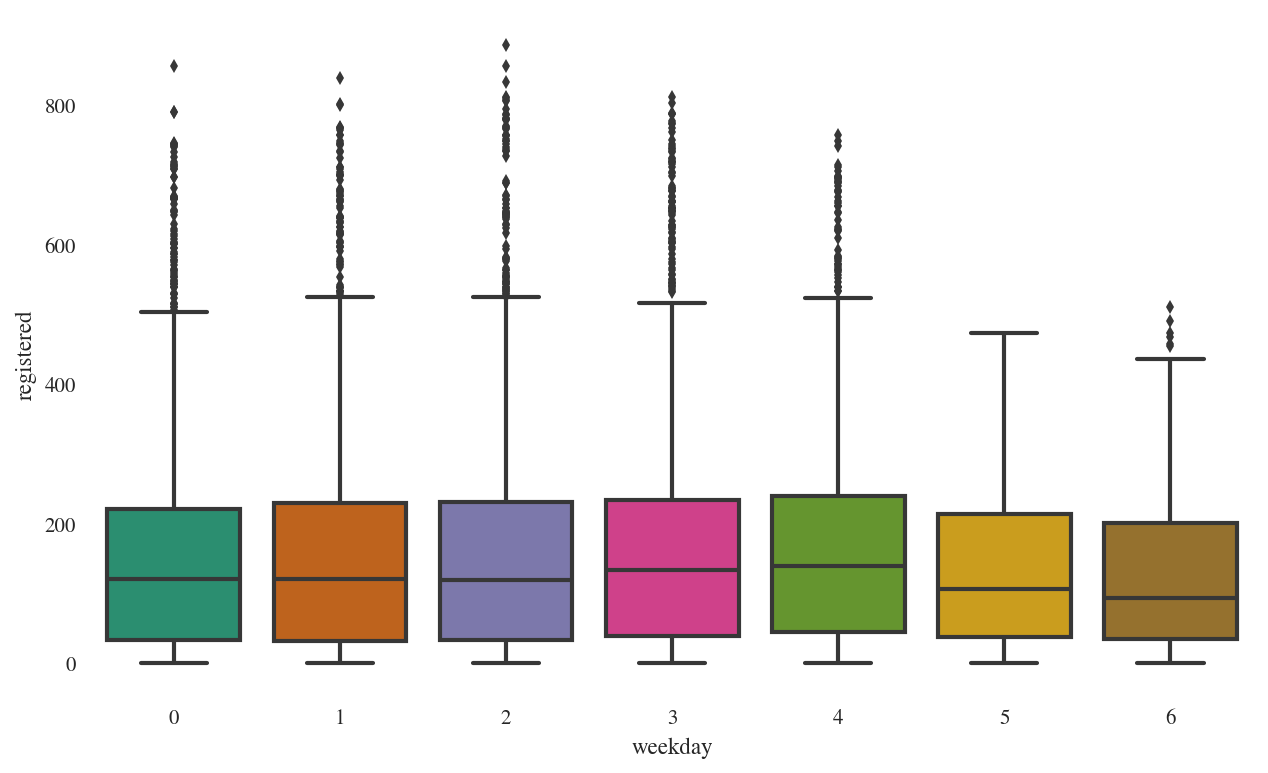

In [67]:
sns.boxplot(registered['weekday'],registered['registered'])
plt.show()

In [68]:
#No binning of weekday will work
casual_cat.append("weekday")
reg_cat.append("weekday")

In [69]:
casual.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'month', u'year',
       u'day', u'hour', u'weekday', u'weekends', u'month_bin1',
       u'ordered_months', u'month_bin2', u'season_bin', u'hour_bin'],
      dtype='object')

In [70]:
#continous variables -temp,atemp,humidity,windspeed
casual_cont+=["temp","atemp","humidity","windspeed"]
reg_cont+=["temp","atemp","humidity","windspeed"]

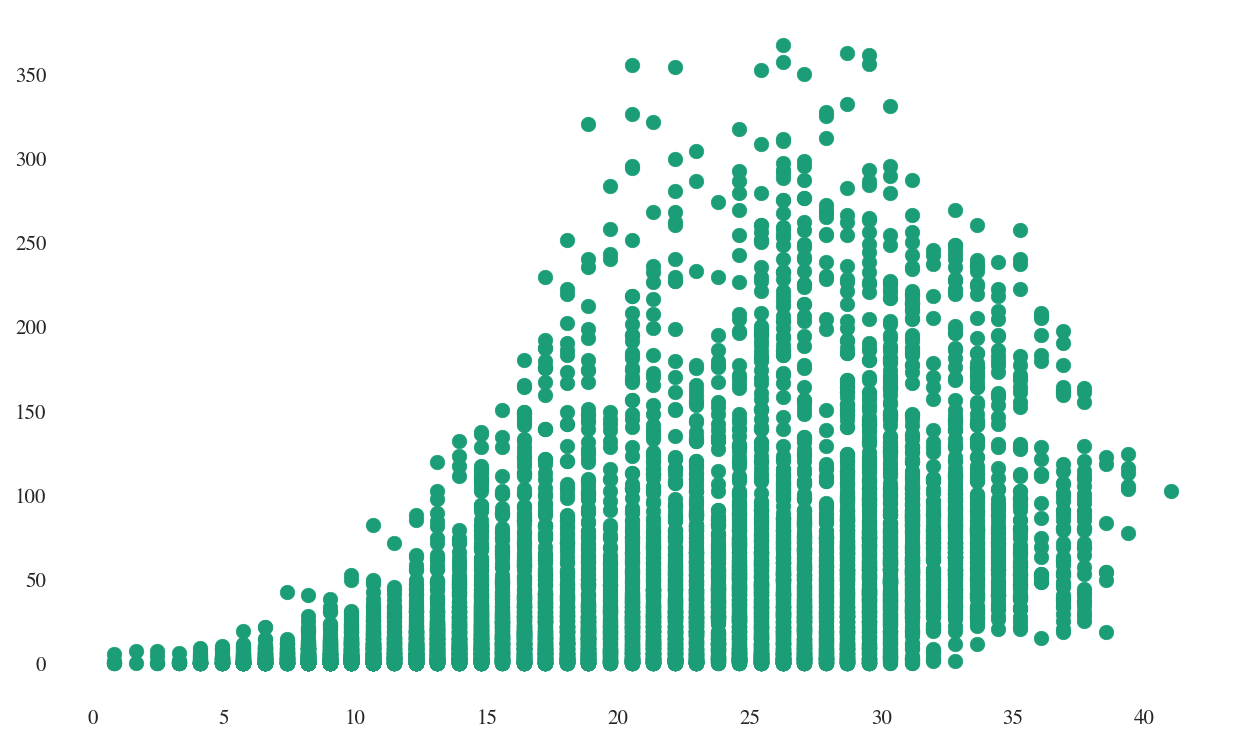

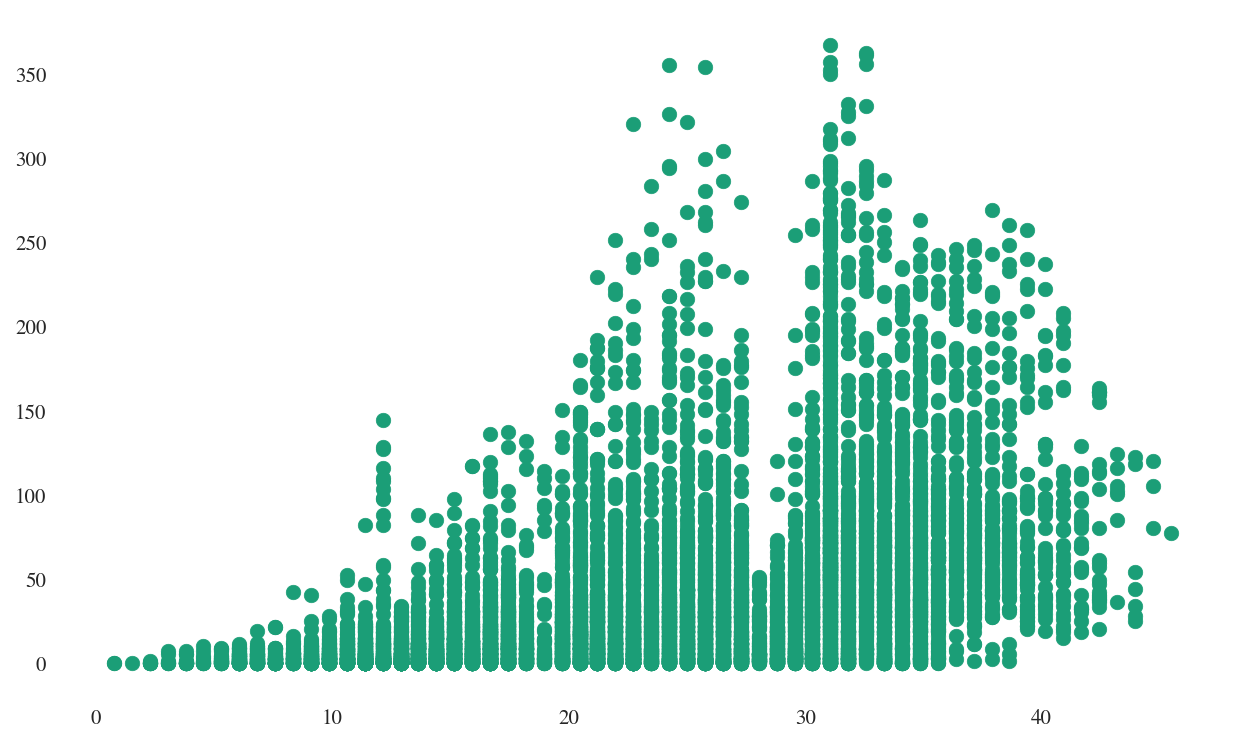

In [71]:
plt.scatter(casual['temp'],casual['casual'])
plt.show()
plt.scatter(casual['atemp'],casual['casual'])
plt.show()

In [72]:
casual['more_20']=0
casual['amore_28']=0
casual['more_20'][(casual['temp']>20)]=1
casual['amore_28'][(casual['atemp']>28)]=1

test_cas['more_20']=0
test_cas['amore_28']=0
test_cas['more_20'][(test_cas['temp']>20)]=1
test_cas['amore_28'][(test_cas['atemp']>28)]=1



In [73]:
casual_cat+=["more_20","amore_28"]

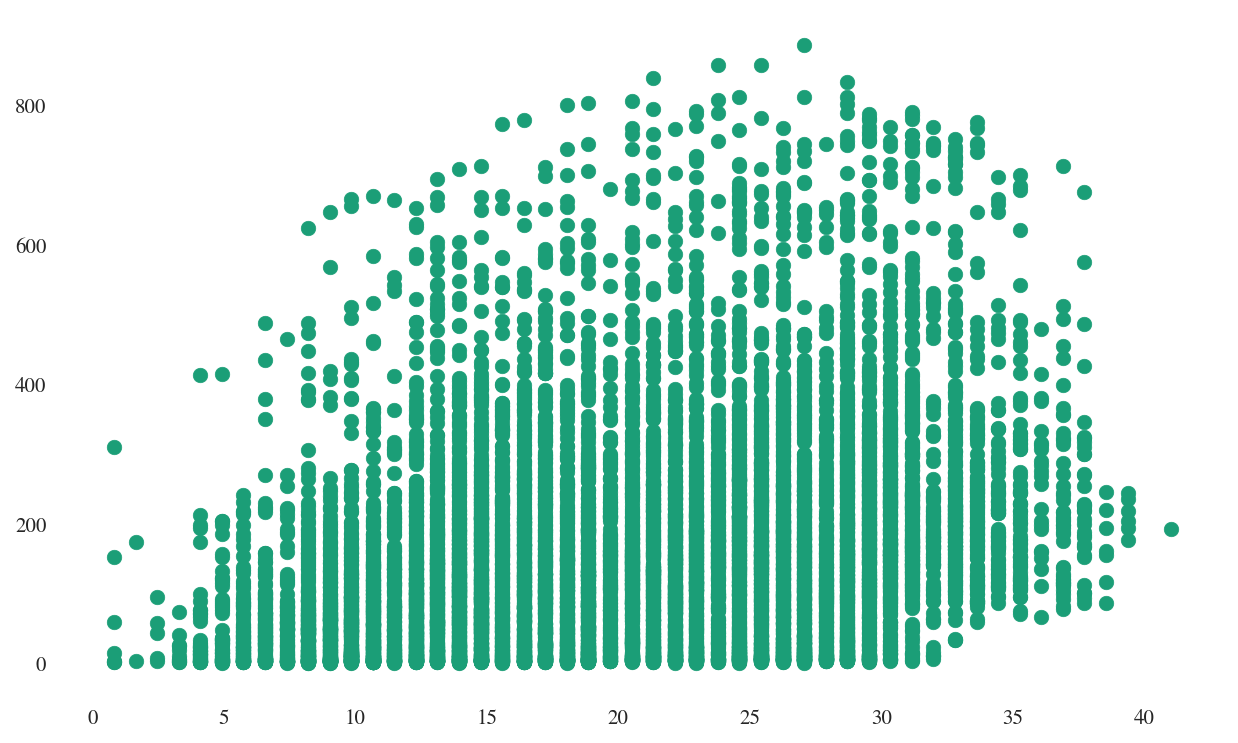

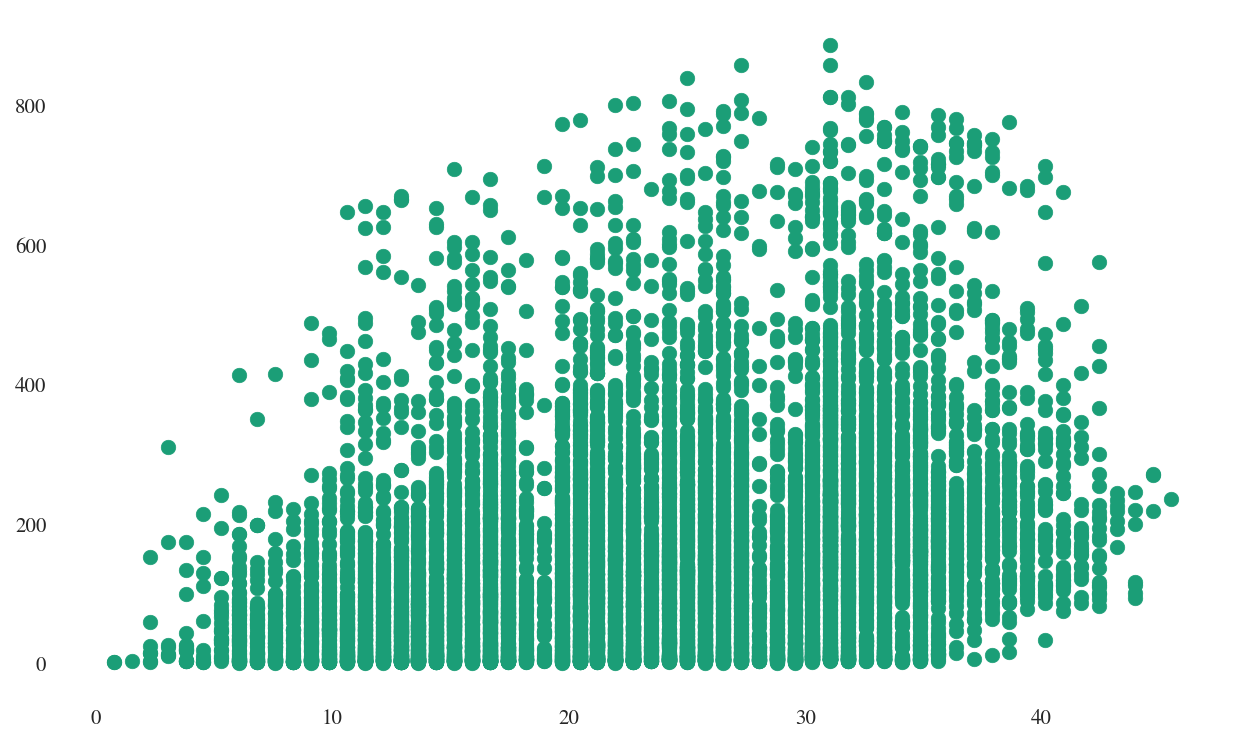

In [74]:
plt.scatter(registered['temp'],registered['registered'])
plt.show()
plt.scatter(registered['atemp'],registered['registered'])
plt.show()

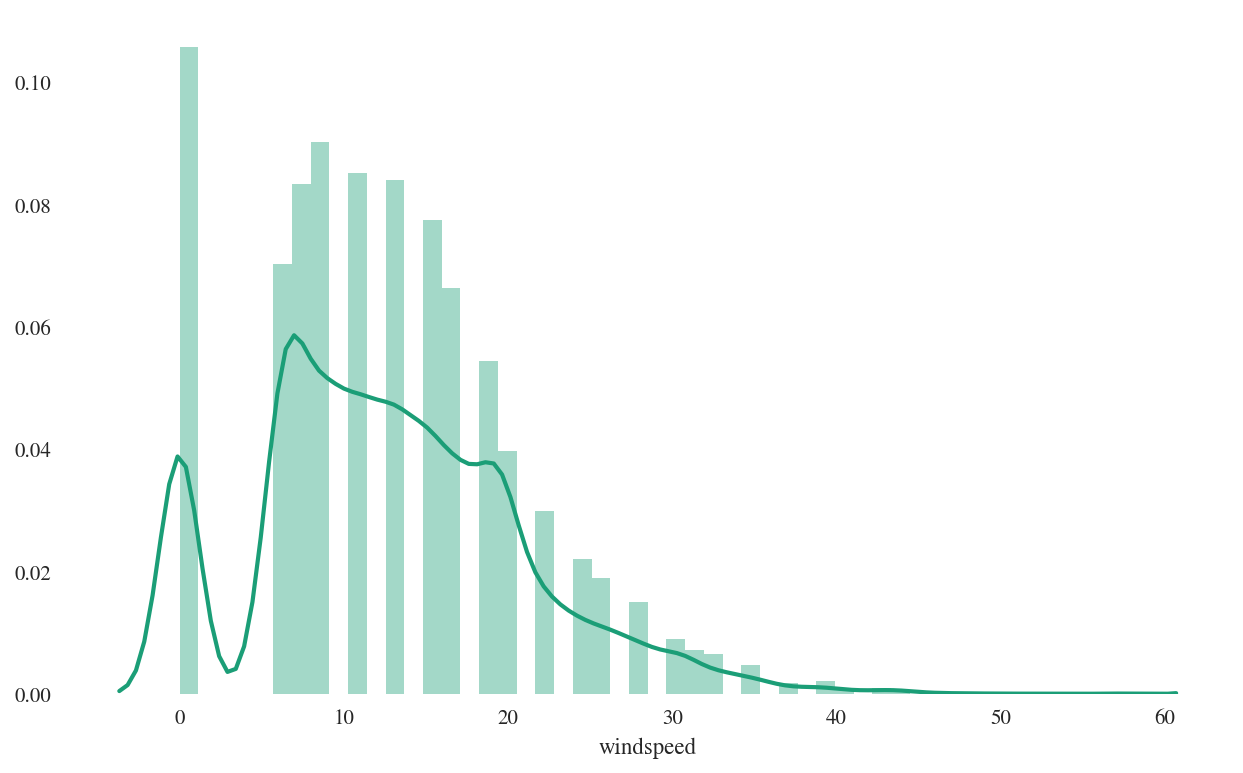

In [75]:
sns.distplot(casual['windspeed'])
plt.show()

In [76]:
casual['windspeed_0']=0
casual['windspeed_0'][(casual['windspeed']==0)]=1

test_cas['windspeed_0']=0
test_cas['windspeed_0'][(test_cas['windspeed']==0)]=1

In [77]:
casual['new_windspeed']=casual['windspeed'].apply(lambda x: 1/x if x!=0 else 0)

In [78]:
test_cas['new_windspeed']=test_cas['windspeed'].apply(lambda x: 1/x if x!=0 else 0)

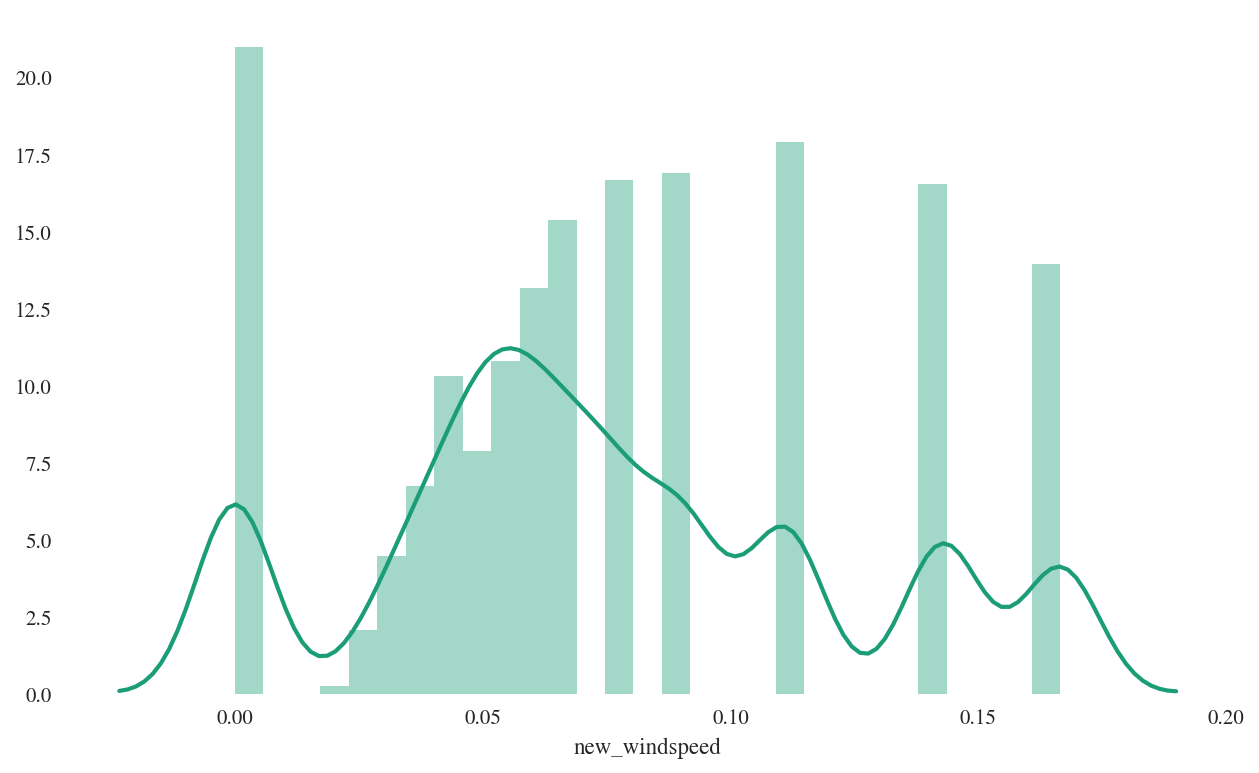

In [79]:
sns.distplot(casual['new_windspeed'])
plt.show()

In [80]:
casual_cont.append("new_windspeed")
casual_cat.append("windspeed_0")

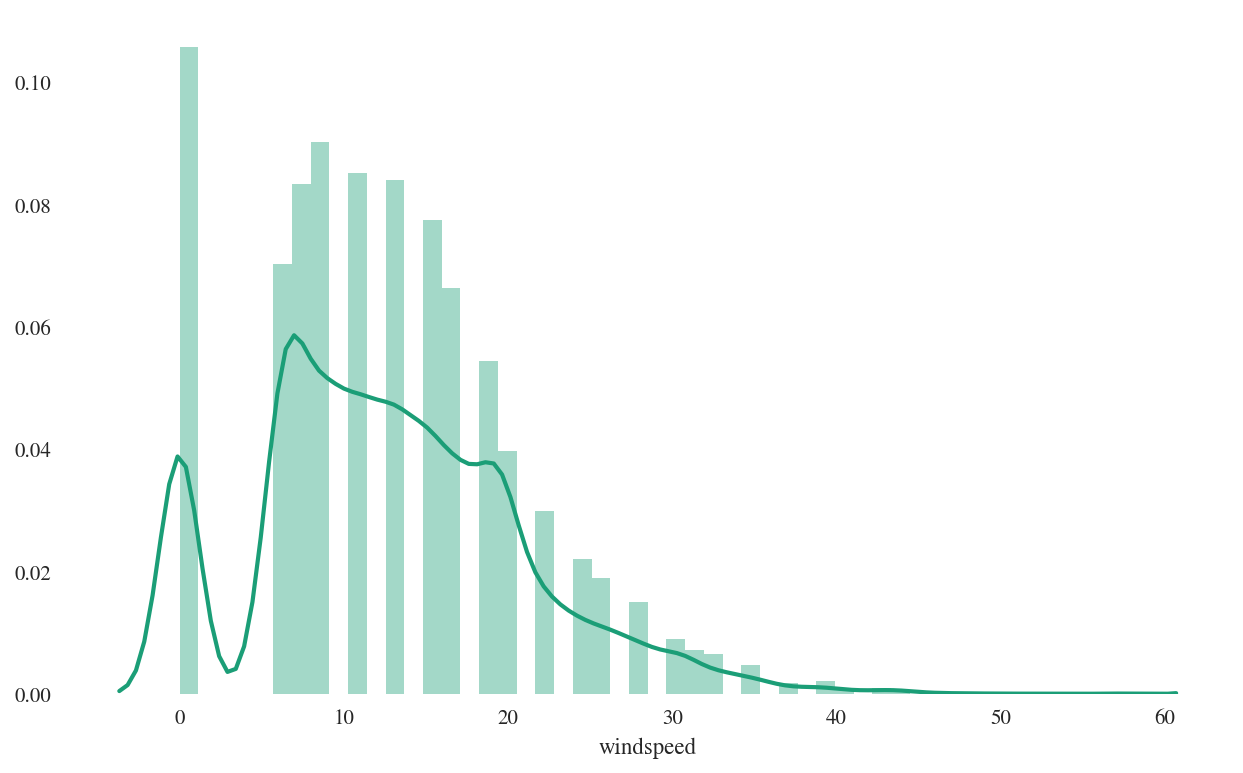

In [81]:
sns.distplot(registered['windspeed'])
plt.show()

In [82]:
registered['windspeed_0']=0
registered['windspeed_0'][(registered['windspeed']==0)]=1

test_reg['windspeed_0']=0
test_reg['windspeed_0'][(test_reg['windspeed']==0)]=1

registered['new_windspeed']=registered['windspeed'].apply(lambda x: 1/x if x!=0 else 0)
reg_cont.append("new_windspeed")
reg_cat.append("windspeed_0")

In [83]:
test_reg['new_windspeed']=test_reg['windspeed'].apply(lambda x: 1/x if x!=0 else 0)

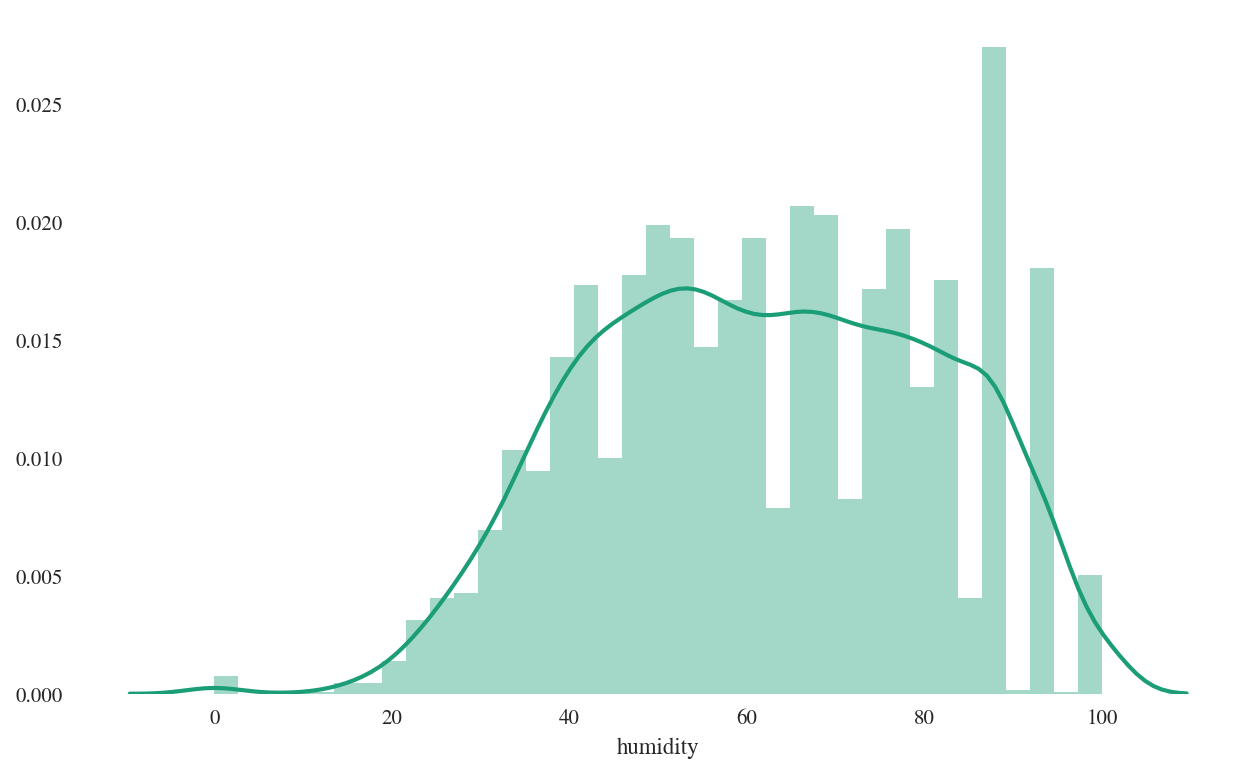

In [84]:
sns.distplot(casual['humidity'])
plt.show()

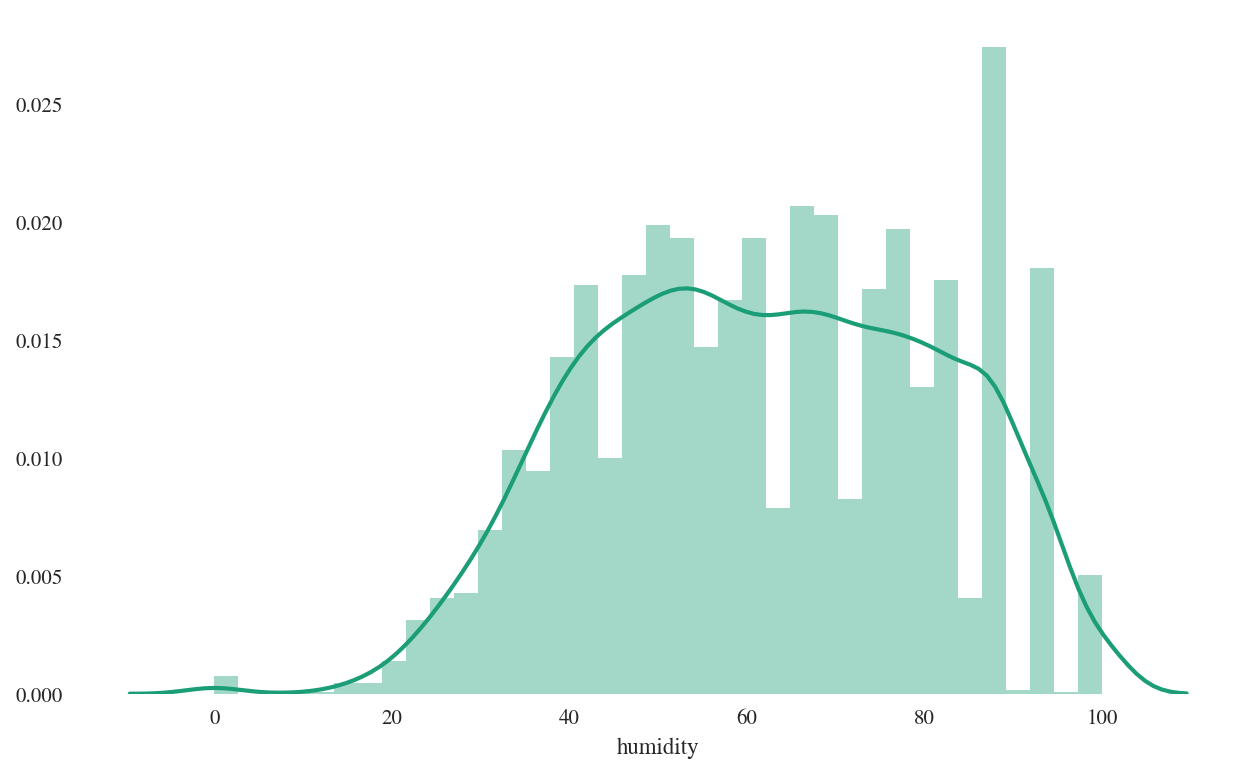

In [85]:
sns.distplot(registered['humidity'])
plt.show()

In [86]:
casual['logcasual']=np.log(casual['casual']+1)

In [87]:
registered['logregistered']=np.log(registered['registered']+1)

In [88]:
#training model and feature importance

In [89]:
casual_cat.append("weekends")

In [90]:
print "casual categorical variable"
print casual_cat
print "casual continous variable"
print casual_cont

print "registered categorical variable"
print reg_cat
print "registered continous variable"
print reg_cont

casual categorical variable
['weather', 'weekends', 'month', 'month_bin1', 'ordered_months', 'month_bin2', 'season', 'season_bin', 'holiday', 'workingday', 'year', 'weekends', 'hour', 'hour_bin', 'weekday', 'more_20', 'amore_28', 'windspeed_0', 'weekends']
casual continous variable
['temp', 'atemp', 'humidity', 'windspeed', 'new_windspeed']
registered categorical variable
['weather', 'weekends', 'month', 'month_bin1', 'ordered_months', 'month_bin2', 'season', 'season_bin', 'holiday', 'workingday', 'year', 'weekends', 'hour', 'hour_bin', 'weekday', 'windspeed_0']
registered continous variable
['temp', 'atemp', 'humidity', 'windspeed', 'new_windspeed']


In [91]:
casual_train=casual[list(set(casual_cat))]
casual_train[casual_cont]=casual[casual_cont]

In [92]:
casual_test=test_cas[list(set(casual_cat))]
casual_test[casual_cont]=test_cas[casual_cont]

In [93]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
rf = RandomForestRegressor()
param_grid = {'n_estimators':[50,100,500,1000],
            'max_features':[0.05,0.2,0.5,1.0]}
grid_search = GridSearchCV(rf, param_grid=param_grid, scoring = 'mean_squared_error')
grid_search.fit(casual_train, casual['logcasual'])
print grid_search.best_params_

/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anac

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 500, 1000], 'max_features': [0.05, 0.2, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

{'max_features': 0.5, 'n_estimators': 500}


In [94]:
#checking cross_val score
rf1 = RandomForestRegressor(max_features =  0.5, n_estimators = 500)
rf1.fit(casual_train, casual['logcasual'])
predi1 = rf1.predict(casual_test)
print np.mean(cross_val_score(rf1, casual_train, casual['logcasual'], cv = 5, scoring = 'mean_squared_error'))
importances = rf1.feature_importances_
indices = np.argsort(importances)[::-1]
for i in indices[:20]:
    print casual_train.columns[i]

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/a

-0.346768679818
hour
hour_bin
temp
atemp
humidity
workingday
weekday
more_20
ordered_months
month_bin1
weather
month_bin2
month
windspeed
weekends
new_windspeed
amore_28
season
year
season_bin


In [95]:
# #try without dummy with top 5 variables
# casual_train=casual[["hour","hour_bin","atemp","humidity","workingday","weekday","more_20","ordered_months","month_bin1","weather"]]
# casual_test=test_cas[["hour","hour_bin","atemp","humidity","workingday","weekday","more_20","ordered_months","month_bin1","weather"]]
# rf1 = RandomForestRegressor(max_features =  0.5, n_estimators = 500)
# rf1.fit(casual_train, casual['logcasual'])
# predi1 = rf1.predict(casual_test)
# print np.mean(cross_val_score(rf1, casual_train, casual['logcasual'], cv = 5, scoring = 'mean_squared_error'))

In [96]:
reg_train=registered[list(set(reg_cat))]
reg_train[reg_cont]=registered[reg_cont]
reg_test=test_reg[list(set(reg_cat))]
reg_test[reg_cont]=test_reg[reg_cont]
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
rf = RandomForestRegressor()
param_grid = {'n_estimators':[50,100,500,1000],
            'max_features':[0.05,0.2,0.5,1.0]}
grid_search = GridSearchCV(rf, param_grid=param_grid, scoring = 'mean_squared_error')
grid_search.fit(reg_train, registered['logregistered'])
print grid_search.best_params_

rf1 = RandomForestRegressor(max_features =  0.5, n_estimators = 500)
rf1.fit(reg_train, registered['logregistered'])
predi1 = rf1.predict(reg_test)
print np.mean(cross_val_score(rf1, reg_train, registered['logregistered'] , cv = 5, scoring = 'mean_squared_error'))
importances = rf1.feature_importances_
indices = np.argsort(importances)[::-1]
for i in indices[:20]:
    print reg_train.columns[i]

/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/a

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 500, 1000], 'max_features': [0.05, 0.2, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

{'max_features': 0.5, 'n_estimators': 500}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/a

-0.192523089491
hour
hour_bin
ordered_months
month_bin2
workingday
weekday
humidity
atemp
weekends
temp
weather
month
windspeed
new_windspeed
year
month_bin1
season
holiday
season_bin
windspeed_0


In [97]:
#lets try with xgboost
from xgboost.sklearn import XGBRegressor
from sklearn.cross_validation import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV

In [98]:
casual_train['weekends']=casual_train['weekends'].astype("int")

In [99]:
xgb=XGBRegressor(n_estimators=500,objective='reg:linear',silent=False)
xgb.fit(casual_train,casual['logcasual'])
print np.mean(cross_val_score(xgb, casual_train, casual['logcasual'] , cv = 5, scoring = 'neg_mean_squared_error'))

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

-0.400296607086


In [100]:
xgb=XGBRegressor(n_estimators=500,objective='reg:linear',silent=False)
xgb.fit(casual_train,casual['logcasual'])
print np.mean(cross_val_score(xgb, casual_train, casual['logcasual'] , cv = 5, scoring = 'neg_mean_squared_error'))

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

-0.400296607086


In [101]:
#xgb always do better

In [102]:
reg_train['weekends']=reg_train['weekends'].astype("int")

In [103]:
xgb=XGBRegressor(n_estimators=500,objective="reg:linear",silent=False)
xgb.fit(reg_train,registered['logregistered'])
print np.mean(cross_val_score(xgb,reg_train,registered['logregistered'],cv=5,scoring="neg_mean_squared_error"))

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

-0.177102790697


In [104]:
import operator
imp=xgb.booster().get_fscore()
sorted(imp.items(),key=operator.itemgetter(1),reverse=True)

[('hour', 1095),
 ('humidity', 430),
 ('weekday', 305),
 ('temp', 280),
 ('atemp', 248),
 ('workingday', 203),
 ('weather', 148),
 ('windspeed', 142),
 ('month_bin2', 128),
 ('ordered_months', 99),
 ('month', 81),
 ('weekends', 78),
 ('new_windspeed', 67),
 ('holiday', 55),
 ('month_bin1', 29),
 ('season', 25),
 ('windspeed_0', 8),
 ('year', 4)]

In [105]:
param_grid={'n_estimators':[50,100,500,1000],'max_depth':[2,3,4,5],'learning_rate':[0.05,0.1,0.2,0.3]}

In [106]:
xgb=XGBRegressor(objective="reg:linear")
gridsearch = GridSearchCV(estimator=xgb, param_grid=param_grid,scoring = 'neg_mean_squared_error',cv=5,iid=False,n_jobs=2)
gridsearch.fit(reg_train, registered['logregistered'])
print gridsearch.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=2,
       param_grid={'n_estimators': [50, 100, 500, 1000], 'learning_rate': [0.05, 0.1, 0.2, 0.3], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

{'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 5}


In [107]:
xgb=XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=5,objective="reg:linear",silent=False,seed=1301)
xgb.fit(reg_train,registered['logregistered'])
print np.mean(cross_val_score(xgb,reg_train,registered['logregistered'],cv=5,scoring="neg_mean_squared_error"))

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1301, silent=False, subsample=1)

-0.171316939071


In [108]:
#now lets use the original xgb not the wrapper
import xgboost as xgb

In [109]:
xgb1=XGBRegressor(n_estimators=500,
                 learning_rate=0.05,
                 max_depth=5,
                 min_child_weight=1,
                 objective='reg:linear',
                 reg_alpha=0,
                 reg_lambda=1,
                 scale_pos_weight=1,
                 seed=1401,
                 )
params=xgb1.get_xgb_params()
xgtrain=xgb.DMatrix(reg_train.values,label=registered['logregistered'].values)
cvresult=xgb.cv(params,xgtrain,num_boost_round=xgb1.get_params()['n_estimators'], nfold=5,
             metrics='rmse', early_stopping_rounds=50)
xgb1.set_params(n_estimators=cvresult.shape[0])
xgb1.fit(reg_train,registered['logregistered'],eval_metric='rmse')
print np.mean(cross_val_score(xgb1,reg_train,registered['logregistered'],cv=5,scoring="mean_squared_error"))

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1401, silent=True, subsample=1)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1401, silent=True, subsample=1)

/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


-0.171316939071


/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [110]:
#make the process of tuning clear
#randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score,train_test_split
rf=RandomForestRegressor()
params={"n_estimators":[50,100,500],"max_depth":[3,5,7,9],"max_features":[10,5,3,4]}
gridsearch=GridSearchCV(rf,param_grid=params,scoring="neg_mean_squared_error")
gridsearch.fit(reg_train,registered['registered'])

print gridsearch.best_params_

#training on best paramters and predicting

rf=RandomForestRegressor(n_estimators=500,max_depth=9,max_features=9)
rf.fit(reg_train,registered['registered'])
pred1=rf.predict(reg_test)
#crossvalidation score
print np.mean(cross_val_score(rf,reg_train,registered['registered'],scoring="neg_mean_squared_error",cv=5))
from sklearn.metrics import mean_squared_error
#mean_squared_error(y_true,y_pred)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 500], 'max_features': [10, 5, 3, 4], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

{'max_features': 10, 'n_estimators': 50, 'max_depth': 9}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features=9, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

-4072.69380749


In [111]:
#lets work on xgboost training and tuning
from xgboost.sklearn import XGBRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
import xgboost as xgb
xg1=XGBRegressor(objective="reg:linear")
params_g={"n_estimators":[50,500,1000]}
grid_search=GridSeachCV(xg1,param_grid=params,scoring="neg_mean_squared_error")
grid_search.fit(reg_train,registered['registered'])

print gridsearch.best_params_

#now use xgboost wrapper to predict with these parameters

#training original xgboost
parm={objective:"reg:linear",
          "eta": 0.05,
          "max_depth": 8,
          "subsample": 1,
          "colsample_bytree": 1,
          'gamma':1.0,
          'min_child_weight':5,
          "silent": 1,
          "seed": 1301,
          "eval_metric": 'rmse'
     }

print("Train a XGBoost model with cross val data")
dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_test, y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(parms, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50, verbose_eval=True)

#after this train this on complete data
print("Train a XGBoost model")
dtrain = xgb.DMatrix(train.drop(['timestamp', 'Outcome'], axis=1), train['Outcome'])
watchlist = [(dtrain, 'train')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50, verbose_eval=True)
#predict
pred1=gbm.predict(xgb.DMatrix(test[train.columns]))

NameError: name 'GridSeachCV' is not defined

In [ ]:
?GridSearchCV

In [112]:
train.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered', u'count',
       u'month', u'year', u'day', u'hour', u'weekday', u'weekends'],
      dtype='object')

In [113]:
test.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'month', u'year', u'day', u'hour',
       u'weekday', u'weekends', u'ordered_months'],
      dtype='object')

In [114]:
casual.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'month', u'year',
       u'day', u'hour', u'weekday', u'weekends', u'month_bin1',
       u'ordered_months', u'month_bin2', u'season_bin', u'hour_bin',
       u'more_20', u'amore_28', u'windspeed_0', u'new_windspeed',
       u'logcasual'],
      dtype='object')

In [115]:
casual.dtypes

datetime          datetime64[ns]
season                     int64
holiday                    int64
workingday                 int64
weather                    int64
temp                     float64
atemp                    float64
humidity                   int64
windspeed                float64
casual                     int64
month                      int64
year                       int64
day                        int64
hour                       int64
weekday                    int64
weekends                  object
month_bin1                 int64
ordered_months             int64
month_bin2                 int64
season_bin                 int64
hour_bin                   int64
more_20                    int64
amore_28                   int64
windspeed_0                int64
new_windspeed            float64
logcasual                float64
dtype: object

In [117]:
casual['weekends']=casual['weekends'].astype('int')

In [118]:
test.dtypes

datetime          datetime64[ns]
season                     int64
holiday                    int64
workingday                 int64
weather                    int64
temp                     float64
atemp                    float64
humidity                   int64
windspeed                float64
month                      int64
year                       int64
day                        int64
hour                       int64
weekday                    int64
weekends                  object
ordered_months             int64
dtype: object

In [123]:
"""xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, 
stratified=False, folds=None, metrics=(), obj=None, feval=None,
maximize=False, early_stopping_rounds=None, fpreproc=None, 
as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)"""
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
col=['season','holiday','workingday','temp','atemp','weather']
param={'objective':"reg:linear","eta": 0.05,"max_depth": 8,
          "subsample": 1,"colsample_bytree": 1,'gamma':1.0,
          'min_child_weight':5,"silent": 1,"seed": 1301,"eval_metric": 'rmse'}
algo=XGBClassifier(param)


'xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, \nstratified=False, folds=None, metrics=(), obj=None, feval=None,\nmaximize=False, early_stopping_rounds=None, fpreproc=None, \nas_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)'

In [144]:
dtrain=xgb.DMatrix(casual[col].values, label=casual['logcasual'].values)
p=xgb.cv(param,dtrain,num_boost_round=800,nfold=5,metrics="rmse",early_stopping_rounds=30)

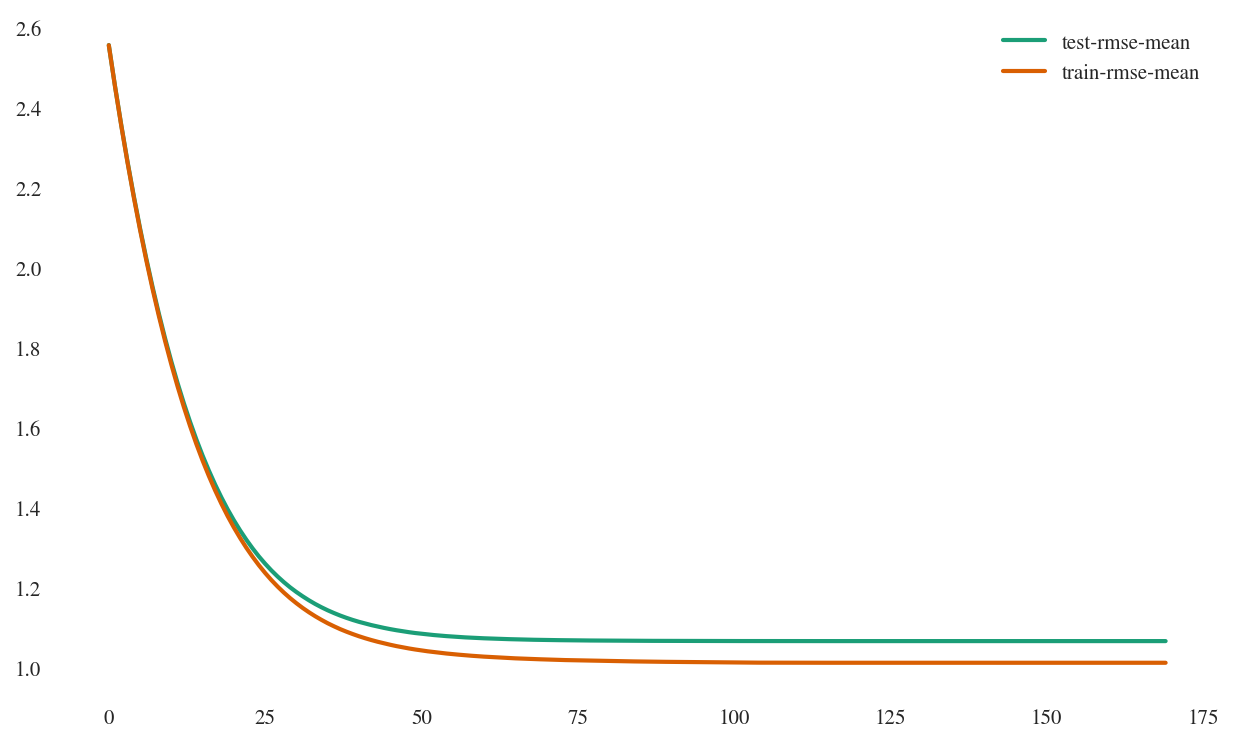

In [145]:
plt.plot(p['test-rmse-mean'])
plt.plot(p['train-rmse-mean'])
plt.legend()
plt.show()

In [148]:
watchlist = [(dtrain, 'train')]
gbm=xgb.train(param, dtrain, num_boost_round=169, evals=watchlist, early_stopping_rounds=50, verbose_eval=True)

[0]	train-rmse:2.55734
Will train until train-rmse hasn't improved in 50 rounds.
[1]	train-rmse:2.45318
[2]	train-rmse:2.35514
[3]	train-rmse:2.26289
[4]	train-rmse:2.17624
[5]	train-rmse:2.09488
[6]	train-rmse:2.01833
[7]	train-rmse:1.94674
[8]	train-rmse:1.87964
[9]	train-rmse:1.81681
[10]	train-rmse:1.75809
[11]	train-rmse:1.70307
[12]	train-rmse:1.65184
[13]	train-rmse:1.60385
[14]	train-rmse:1.55905
[15]	train-rmse:1.51776
[16]	train-rmse:1.47906
[17]	train-rmse:1.44321
[18]	train-rmse:1.41014
[19]	train-rmse:1.37936
[20]	train-rmse:1.3509
[21]	train-rmse:1.32442
[22]	train-rmse:1.30018
[23]	train-rmse:1.27775
[24]	train-rmse:1.25701
[25]	train-rmse:1.23816
[26]	train-rmse:1.22063
[27]	train-rmse:1.20443
[28]	train-rmse:1.18963
[29]	train-rmse:1.17586
[30]	train-rmse:1.16315
[31]	train-rmse:1.15121
[32]	train-rmse:1.14062
[33]	train-rmse:1.13069
[34]	train-rmse:1.1217
[35]	train-rmse:1.11356
[36]	train-rmse:1.10593
[37]	train-rmse:1.09901
[38]	train-rmse:1.0927
[39]	train-rmse:1.0

"xgboost.plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance',\nxlabel='F score', ylabel='Features', importance_type='weight', max_num_features=None, grid=True, **kwargs)"

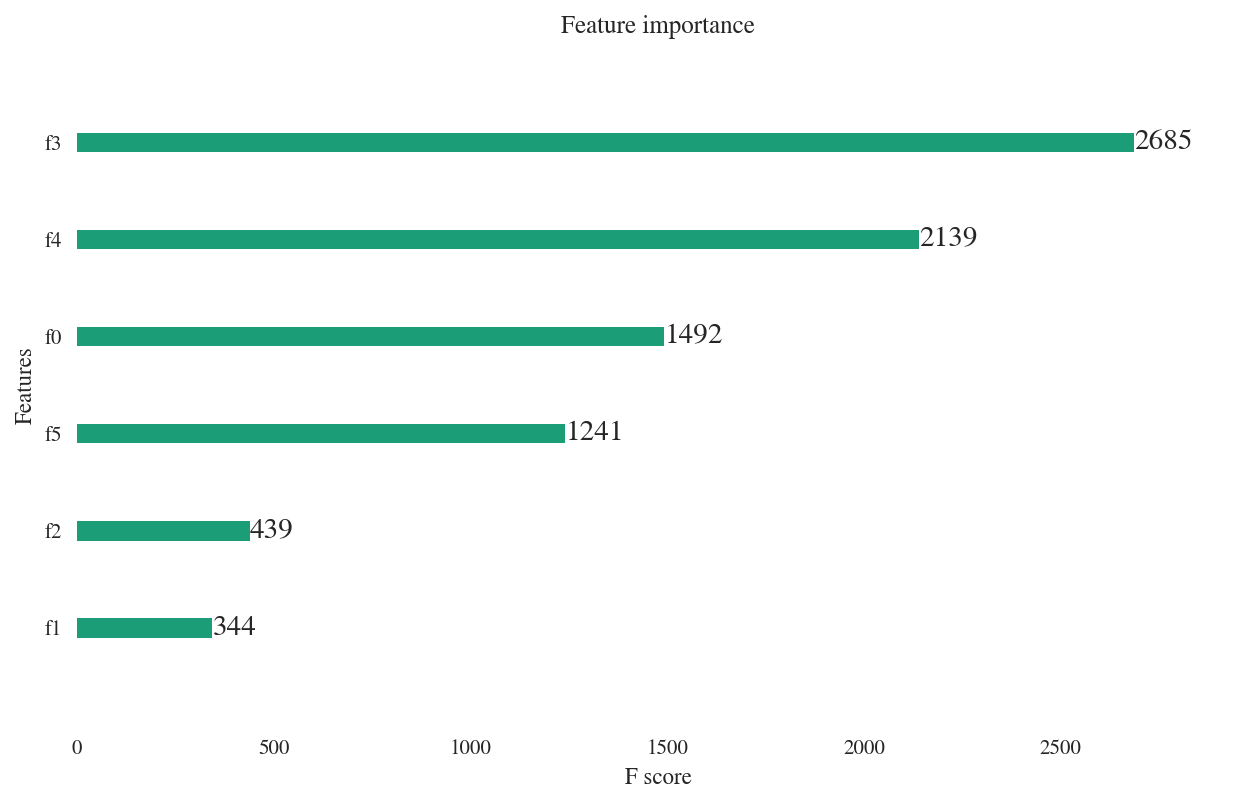

In [150]:
#getting feature importance 
"""xgboost.plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance',
xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=None, grid=True, **kwargs)"""
xgb.plot_importance(gbm,ax=None)


In [153]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i,feat))
    outfile.close()
    
create_feature_map(col)
gbm.dump_model('xgbmodel.txt', 'xgb.fmap', with_stats=True)
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
imp_df = pd.DataFrame(importance, columns=['feature','fscore'])
imp_df['fscore'] = imp_df['fscore'] / imp_df['fscore'].sum()
imp_df.to_csv("imp_feat.txt", index=False)